In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2
import time
import random
import requests
import urllib.request
from nba_api.stats.static import teams, players
from nba_api.stats.endpoints import teamgamelog,leaguedashteamshotlocations,leaguedashteamstats,drafthistory,playerawards,leagueplayerondetails,teaminfocommon,alltimeleadersgrids,leagueleaders
from nba_api.stats.library.parameters import SeasonAll
from matplotlib.pyplot import suptitle
from matplotlib.patches import Circle, Rectangle, Arc
from matplotlib.offsetbox import  OffsetImage
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import colorama
from colorama import Fore
from skimage import io

plt.style.use('fivethirtyeight') # or seaborn / fivethirtyeight

In [2]:
team_dict = teams.get_teams()
team_dict = sorted(team_dict, key=lambda x: x['full_name'])
player_dict = players.get_players()

In [3]:
# Set skip = True to avoid long computational time
skip = True 

# <p style="text-align: center;"> <span style="color:blue">N<span style="color:lightgrey">B<span style="color:red">A <span style="color:black"> All-Stats Project 🏀

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 45%;"
    src="https://cdn.iconscout.com/icon/free/png-512/nba-282876.png">
</img>

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 50%;"
    src="https://jumperbrasil.lance.com.br/wp-content/uploads/2021/07/Loga-NBA-75-anos.jpg">
</img>

## <p style="text-align: center;"> Group 24 🛠
- Riccardo De Sanctis 
- Gabriele Scognamiglio 
- Matteo De Sanctis 

## <p style="text-align: center;"> **Main Targets of the Project** 🔍

- *Most efficient Field Goal*
- *Change in Three-Pointers Style of Game of Modern NBA*
- *Change in Triple Double Style of Game of Modern NBA*
- *Rookie of the Year Prediction*
- *Game Simulation*
- *Playoffs Simulation*
- *Players Clustering*
- *Most Valuable Player Prediction*

## <p style="text-align: center;"> **Main Targets of Basketball** 📌

**Analyzing** data in basketball has become crucial, since plays can be **tracked** and analyzed for coaching staff to adjust their defensive and offensive **strategy** based off of the team or star they will be playing against. 

One of the main target of teams, coaches and team's analysts is to **maximize wins** and **success rate**.

Wins can be broken down to two main components:

- Increasing **possession per game**

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 45%;"    src="https://thumbs.dreamstime.com/b/whiteboard-basketball-image-court-transparency-blend-mesh-effects-used-all-elements-grouped-can-be-easily-44943167.jpg">
</img>

- Increasing **points per possession**

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 60%;"
    src="https://2.bp.blogspot.com/-6OW0MtigAqY/WVXAJPeaMrI/AAAAAAAAU3E/-XqCTDwIuewtS2XJu9W9oA3uVGvB4RGJQCK4BGAYYCw/s1600/2015-16%2Bregular%2Bseason%2BArchives%2B-%2BInside%2Bthe%2BWarriors-770185.jpg">
</img>

###  <p style="text-align: center;"> **Points per Possession**

This section will **mainly focus** on the **latter**

To understand which method is the best to increase points per possession it's needed to:

- Understand **how points are generated** during the possession

- Understand if it's actually possible to increase points per possession just knowing statistic and **without increasing scoring percentages**

## <p style="text-align: center;"> **Main Targets of the Project** 🔍

- <span style="color:darkturquoise"> ***Most efficient Field Goal 〰***
- *Change in Three-Pointers Style of Game of Modern NBA*
- *Change in Triple Double Style of Game of Modern NBA*
- *Rookie of the Year Prediction*
- *Game Simulation*
- *Playoffs Simulation*
- *Players Clustering*
- *Most Valuable Player Prediction*

### *. . . What is a Field Goal?* 💭

- A Field Goal is a basket scored on **any shot** other than a free throw

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 70%;"
    src="https://hypebeast.com/image/2015/08/nba-compiles-the-best-dunks-from-this-past-season-0.jpg">
</img>

- It's worth **two or three points** depending on the **distance** of the attempt from the basket

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 70%;"
    src="https://thestadiumreviews.com/wp-content/uploads/2021/11/why-is-it-called-a-field-goal-in-basketball.jpg">
</img>

### <p style="text-align: center;"> Field Goals Efficiency Criterion

- *To understand which type of shot is actually the **most efficient** it's necessary to define how to **weight** every shot*

- *We'll use a widespread basketball statistic called **Effective Field Goal** (eFG%)*

- *Effective field goal percentage adjusts field goal percentage to account for the fact that **three-point field goals** count for three points while **regular field goals** only count for two points*


- *Its **goal** is to show what **field goal percentage** a two-point shooter would have to shoot at to **match the output** of a player who also shoots three-pointers*

- *Effective Field Goal Percentage is a **measurement** of how **successful** your team is from the field*  
- *This metric provides a more **complete picture** of the game situation than standard field goal percentages (FG%)*

---
**<p style="text-align: center">*Effective Field Goal %***  
  
---

$$
eFG\% = \frac{FGM + (0.5 \cdot 3PM)}{FGA}
$$

*Where:*
- *FGM = Field Goals Made (any)*
- *3PM = Three-Point Field Goals Made* 
- *FGA = Field Goal Attempts*

<center><img src="https://media.giphy.com/media/H2e4Nz5wXCaNSXsTqH/giphy.gif?cid=ecf05e47ce9mzi10p03zipqbs0h5ihroojbx9ng8sl2jwc25&rid=giphy.gif&ct=g"/></center>


---
**<p style="text-align: center">*Effective Field Goal %***  
  
---

$$
eFG\% = \frac{2FGM + (1.5 \cdot 3PM)}{FGA}
$$

*Alternatively:*<img align="right" width="925" src="https://static.hudl.com/craft/_1600xAUTO_crop_center-center_none/effective-field-goal-equation.png?mtime=20191031105651">
- *2FGM = Two-Points Field Goals Made*
- *3PM = Three-Points Field Goals Made*
- *FGA = Field Goal Attempts*

In [4]:
team_dict = teams.get_teams()
team_dict = sorted(team_dict, key=lambda x: x['full_name'])
player_dict = players.get_players()

In [5]:
if not skip:
    eFG,TwoPM_season,TwoPA_season,FGM_season,FGA_season,ThreePM_season,ThreePA_season = [],[],[],[],[],[],[]

    year = 1982
    yrs = []

    while year != 1996:
        FGM = 0
        FGA = 0
        FG3M = 0
        FG3A = 0
        for team in team_dict:
            team_log = teamgamelog.TeamGameLog(team_id=team['id'], season=str(year), season_type_all_star='Regular Season')
            time.sleep(.25)
            team_games = team_log.get_data_frames()[0]        
            FGM += team_games['FGM'].sum()
            FGA += team_games['FGA'].sum()
            FG3M += team_games['FG3M'].sum()
            FG3A += team_games['FG3A'].sum()

        FGM_season.append(FGM)
        FGA_season.append(FGA)

        TwoPM_season.append(FGM - FG3M)
        TwoPA_season.append(FGA - FG3A)

        ThreePM_season.append(FG3M)
        ThreePA_season.append(FG3A)

        eFG.append(round((FGM + .5 * FG3M) / FGA * 100, 1))
        yrs.append("'"+str(year)[2:])
        year += 1

    while year != 2022:
        team_log = leaguedashteamstats.LeagueDashTeamStats(season=str(year)+'-'+str(year+1)[2:])
        time.sleep(.25)
        team_games = team_log.get_data_frames()[0]

        FGM = team_games['FGM'].sum()
        FGA = team_games['FGA'].sum()
        FG3M = team_games['FG3M'].sum()
        FG3A = team_games['FG3A'].sum()

        FGM_season.append(FGM)
        FGA_season.append(FGA)

        TwoPM_season.append(FGM - FG3M)
        TwoPA_season.append(FGA - FG3A)

        ThreePM_season.append(FG3M)
        ThreePA_season.append(FG3A)

        eFG.append(round((FGM + .5 * FG3M) / FGA * 100, 1))

        yrs.append("'"+str(year)[2:])
        year += 1

In [6]:
if not skip:
    eFG_df = pd.DataFrame(list(zip(yrs, eFG)), columns=['Year', 'eFG%'])
    FGM_season_df = pd.DataFrame(list(zip(yrs, FGM_season)), columns=['Year', 'FGM'])
    FGA_season_df = pd.DataFrame(list(zip(yrs, FGA_season)), columns=['Year', 'FGA'])
    TwoPM_season_df = pd.DataFrame(list(zip(yrs, TwoPM_season)), columns=['Year', '2PM'])
    TwoPA_season_df = pd.DataFrame(list(zip(yrs, TwoPA_season)), columns=['Year', '2PA'])
    ThreePM_season_df = pd.DataFrame(list(zip(yrs, ThreePM_season)), columns=['Year', '3PM'])
    ThreePA_season_df = pd.DataFrame(list(zip(yrs, ThreePA_season)), columns=['Year', '3PA'])
    yrs_df = pd.DataFrame(yrs, columns=['Year'])

In [7]:
if not skip:
    eFG_df.to_csv('df\eFG_df', index=False)
    FGM_season_df.to_csv('df\FGM_season_df', index=False)
    FGA_season_df.to_csv('df\FGA_season_df', index=False)
    TwoPM_season_df.to_csv('df\TwoPM_season_df', index=False)
    TwoPA_season_df.to_csv('df\TwoPA_season_df', index=False)
    ThreePM_season_df.to_csv('df\ThreePM_season_df', index=False)
    ThreePA_season_df.to_csv('df\ThreePA_season_df', index=False)
    yrs_df.to_csv('df\Years_df', index=False)

In [8]:
eFG_df = pd.read_csv('df\eFG_df')
FGM_season_df = pd.read_csv('df\FGM_season_df')
FGA_season_df = pd.read_csv('df\FGA_season_df')
TwoPM_season_df = pd.read_csv('df\TwoPM_season_df')
TwoPA_season_df = pd.read_csv('df\TwoPA_season_df')
ThreePM_season_df = pd.read_csv('df\ThreePM_season_df')
ThreePA_season_df = pd.read_csv('df\ThreePA_season_df')
yrs_df = pd.read_csv('df\Years_df')
yrs = yrs_df['Year'].values.tolist()

In [9]:
def eFg_plot(eFG_df):
    plt.figure(figsize=(28, 11))

    plt.plot(eFG_df['Year'], eFG_df['eFG%'], color='turquoise', label='eFG%', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='turquoise', markersize=7)

    plt.axhline(y=eFG_df['eFG%'].mean(), color='gold', linestyle=':', label='Mean eFG%')
    plt.xlabel('Season')
    plt.ylabel('eFG%')
    plt.title('NBA eFG% throughout seasons (1982 - 2021)')
    plt.axis('tight')
    plt.legend(loc='lower right')
    plt.show()

### <p style="text-align: center;"> Effective Field Goal Percentage

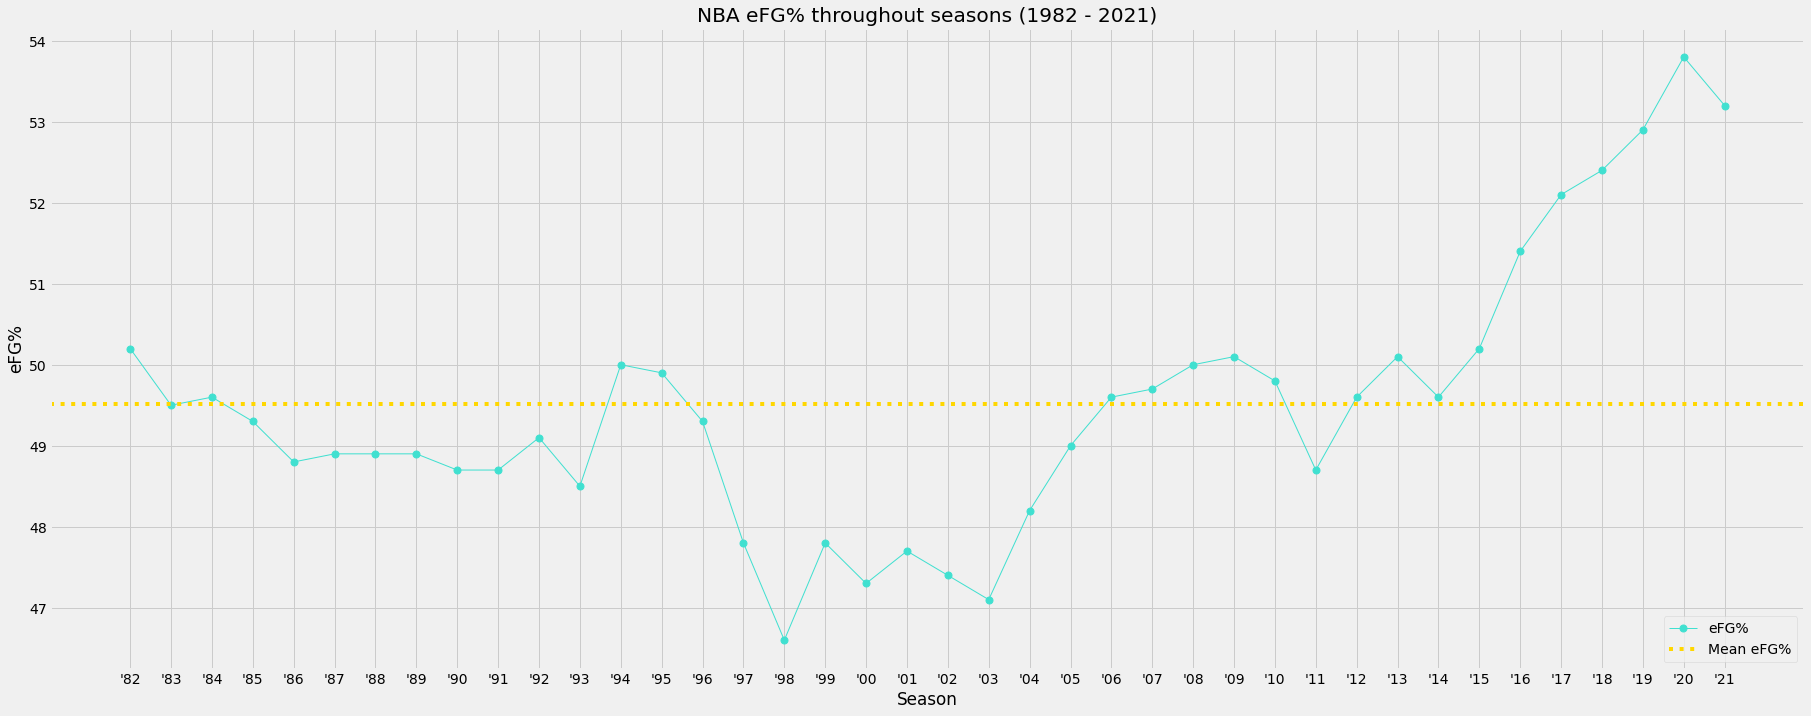

In [10]:
eFg_plot(eFG_df)

In [11]:
                                             # Illustrative Code

eFG_ = []
years = ['2018-19', '2019-20', '2020-21', '2021-22']

for year in years:
    
    # Getting the stats for all teams in the season
    team_games_ = leaguedashteamstats.LeagueDashTeamStats(season=year).get_data_frames()[0]
    time.sleep(.25)

    # Selecting the stats of interest 
    FGM_ = team_games_['FGM'].sum()
    FGA_ = team_games_['FGA'].sum()
    FG3M_ = team_games_['FG3M'].sum()
    
    # Getting the eFG for the season
    eFG_.append(round((FGM_ + 0.5 * FG3M_) / FGA_ * 100, 1))

eFG_

[52.4, 52.9, 53.8, 53.2]

### <p style="text-align: center;"> <span style="color:gold"> The Golden Age 📈

Effective Field Goal % has tremendously **increased** over the **last decade**

A **5% increase** means being **extremely more productive offensively** and being able to **finalize more difficult shots** with respect to past NBA

<p style="text-align: center;"> How come has this happened? 💭

. . . Is offense improving at the **expense** of bad defense on the other side? 💭

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 60%;" src="https://media.giphy.com/media/kiwwko5xwTADDZExtu/giphy.gif?cid=ecf05e47bu2a9rgze90stwy1x7mzeruewzasggsn8l2aelsb&rid=giphy.gif&ct=g">
</img>

In [12]:
def Fg_plot(FGM_season_df, FGA_season_df):
    plt.figure(figsize=(28, 11))

    plt.plot(FGM_season_df['Year'], FGM_season_df['FGM'], color='turquoise', label='FGM', linestyle='-', linewidth = 1, marker='o', markerfacecolor='turquoise', markersize=7)
    plt.plot(FGA_season_df['Year'], FGA_season_df['FGA'], color='gold', label='FGA', linestyle='-', linewidth = 1, marker='o', markerfacecolor='gold', markersize=7)

    plt.xlabel('Season')
    plt.ylabel('FG')
    plt.title('NBA FG throughout seasons (1982 - 2021)')
    plt.axis('tight')
    plt.legend(loc='lower right')
    plt.show()

### <p style="text-align: center;">  Total Field Goal Attempted and Made

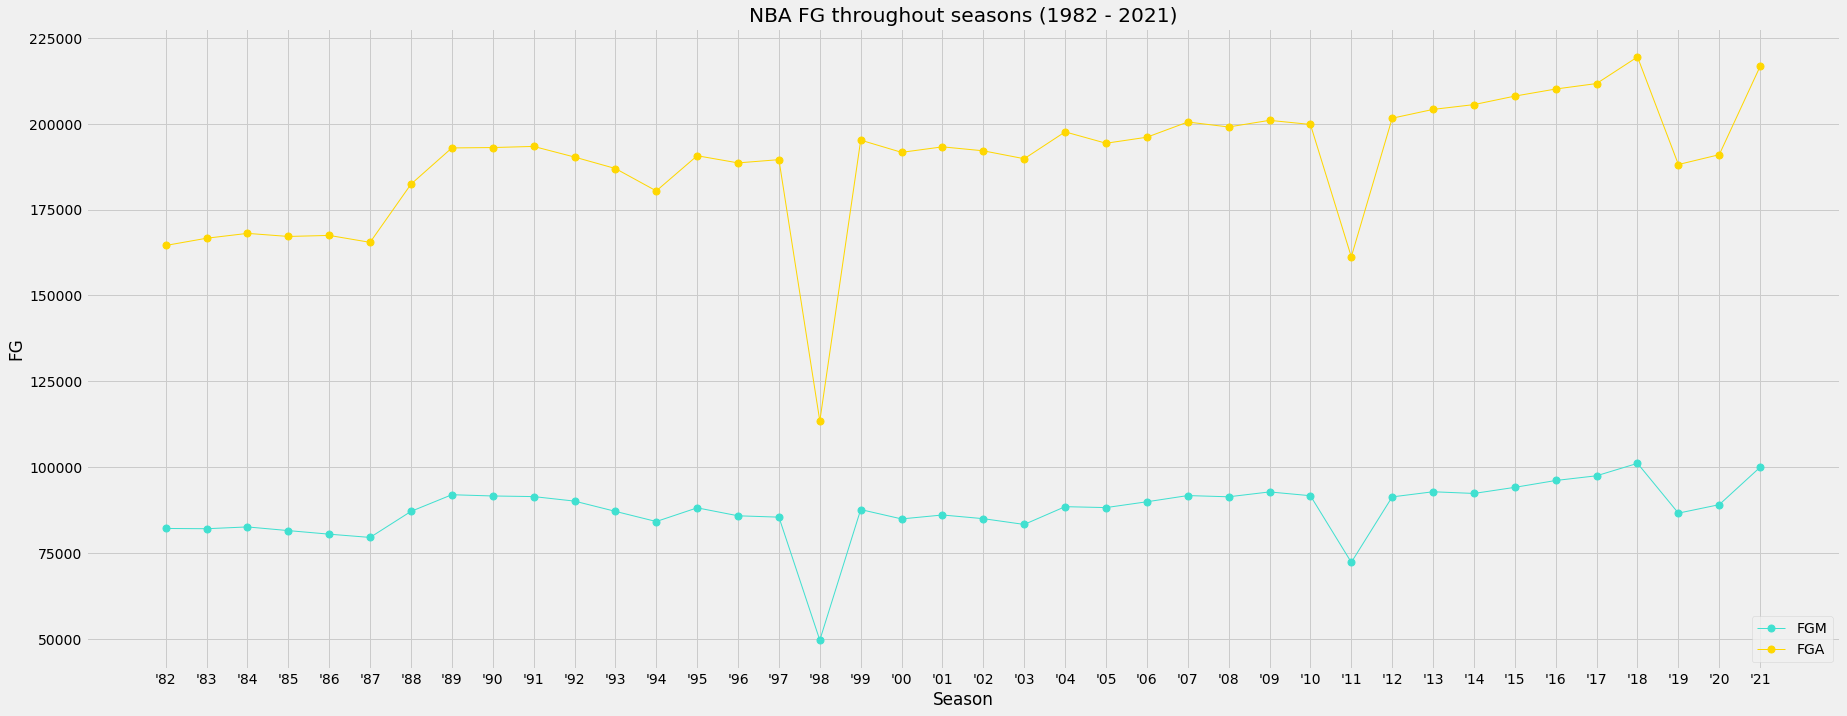

In [13]:
Fg_plot(FGM_season_df, FGA_season_df)

In [14]:
                                                         # Illustrative Code

FGM_season_, FGA_season_ = [], []
years = ['2019-20', '2020-21', '2021-22']

for year in years:
    
    # Getting the stats for all teams in the season
    team_games_ = leaguedashteamstats.LeagueDashTeamStats(season=year).get_data_frames()[0]
    time.sleep(.25)

    # Selecting the stats of interest
    FGM_ = team_games_['FGM'].sum()
    FGA_ = team_games_['FGA'].sum()
    
    # Getting FGM and FGA for the season
    FGM_season_.append(FGM_)
    FGA_season_.append(FGA_)
    
print(f"   Season  \t  {Fore.YELLOW} FGA \t\t  {Fore.CYAN} FGM \n {Fore.RESET}")
for i in range(3):
    print(f"  {years[i]}: \t {Fore.YELLOW} {FGA_season_[i]} \t {Fore.CYAN} {FGM_season_[i]}\n {Fore.RESET}")

   Season  	   FGA 		   FGM 
 
  2019-20: 	  188116 	  86550
 
  2020-21: 	  190983 	  89020
 
  2021-22: 	  216722 	  99930
 


In [15]:
def MissedFGpct_plot(shot_missed_pct):
    plt.figure(figsize=(28, 11))

    plt.plot(shot_missed_pct['Year'], shot_missed_pct['Miss%'], color='teal', label='FG Missed%', linestyle='-', 
             linewidth = 1, marker='o', markerfacecolor='teal', markersize=7)

    plt.xlabel('Season')
    plt.ylabel('Missed FG')
    plt.title('NBA Missed FG% throughout seasons (1982 - 2021)')
    plt.axis('tight')
    plt.legend(loc='lower right')
    plt.show()

In [16]:
shot_missed = pd.DataFrame(list(zip(yrs, FGA_season_df['FGA'] - FGM_season_df['FGM'])), columns=['Year', 'Miss'])
shot_missed_pct = pd.DataFrame(list(zip(yrs, (FGA_season_df['FGA'] - FGM_season_df['FGM']) / FGA_season_df['FGA'] * 100)), columns=['Year', 'Miss%'])

In [17]:
def MissedFG_plot(shot_missed):
    plt.figure(figsize=(28, 11))

    plt.plot(shot_missed['Year'], shot_missed['Miss'], color='teal', label='FG Missed', linestyle='-', 
             linewidth = 1, marker='o', markerfacecolor='teal', markersize=7)

    plt.xlabel('Season')
    plt.ylabel('Missed FG')
    plt.title('NBA Missed FG throughout seasons (1982 - 2021)')
    plt.axis('tight')
    plt.legend(loc='lower right')
    plt.show()

### <p style="text-align: center;">  Total Field Goal Missed

### <p style="text-align: center;">  Total Field Goal Missed %

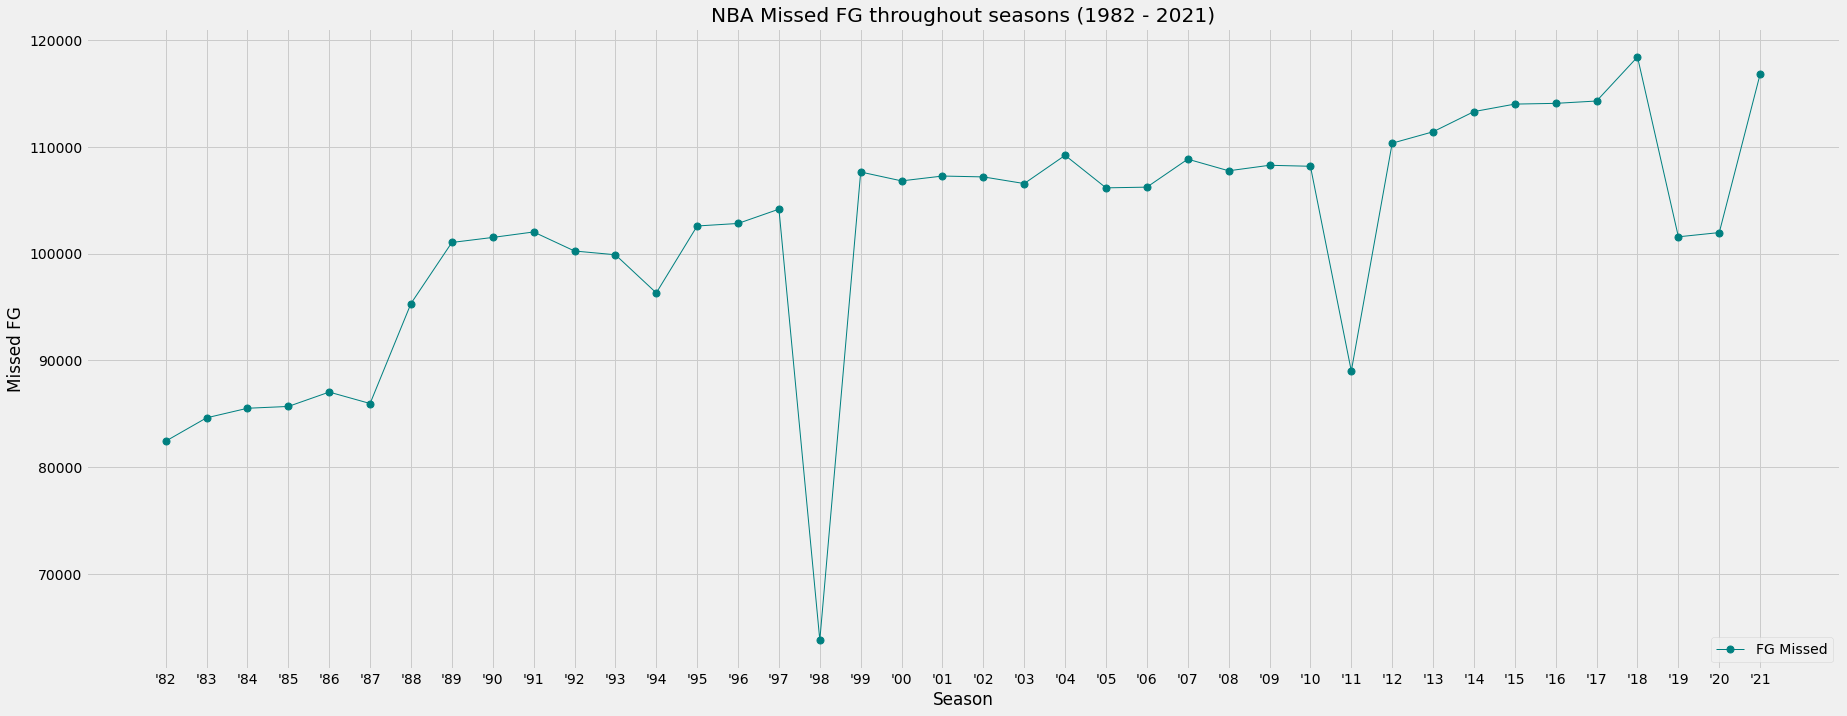

In [18]:
MissedFG_plot(shot_missed)

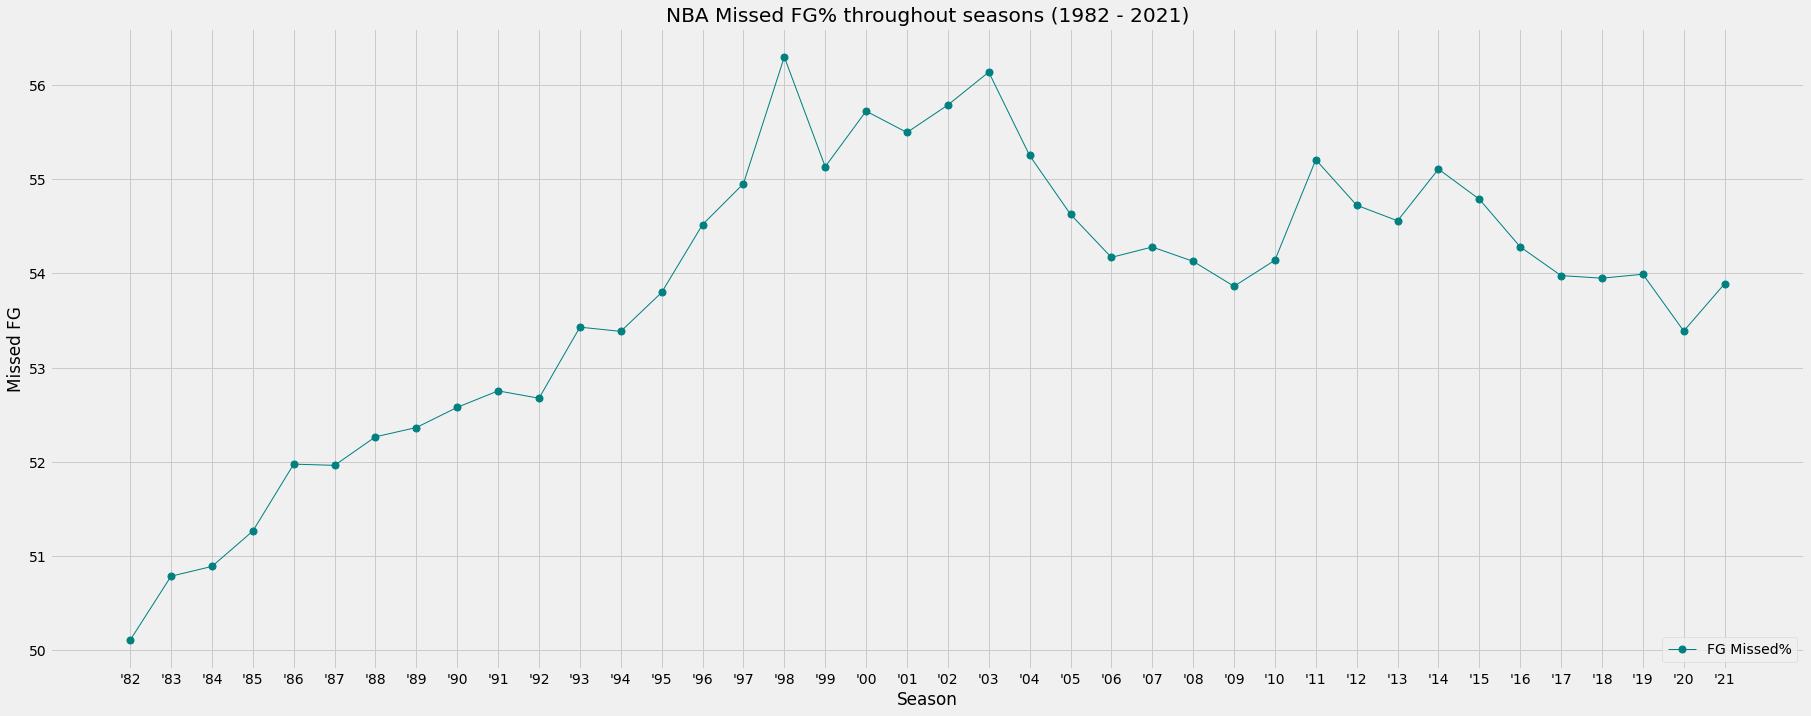

In [19]:
MissedFGpct_plot(shot_missed_pct)

### <p style="text-align: center;"> <span style="color:dimgray"> The Dark Age 📉

Despite a steady increase in shot attempts, actual shots made **didn't increase** accordingly

It actually looks like the **defense has improved** rather than allowing more shots and getting lax

. . . How is possible that **less baskets** scored results in **higher points productions**? 💭

⚠ **Spoiler** ⚠

**Three Points Shots**

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 30%;"
    src="https://cdn.nba.net/nba-drupal-prod/styles/landscape/s3/2018-02/cj-washington-referee-2016.jpg?itok=EF5BTcqM">
</img>

In [20]:
def Fg_plot2(TwoPA_season_df, ThreePA_season_df):
    plt.figure(figsize=(20, 10))
    
    plt.plot(TwoPA_season_df['Year'], TwoPA_season_df['2PA'], color='gold', label='2PA', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='gold', markersize=7)
    
    plt.plot(ThreePA_season_df['Year'], ThreePA_season_df['3PA'], color='teal', label='3PA', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='teal', markersize=7)
    
    plt.xlabel('Season')
    plt.ylabel('FG')
    plt.title('NBA FGA by Value throughout seasons (1982 - 2021)')
    plt.axis('tight')
    plt.legend(loc='lower right')
    plt.show()

In [21]:
def Fg_plot2_(TwoPM_season_df, ThreePM_season_df):
    plt.figure(figsize=(20, 10))
    
    plt.plot(TwoPM_season_df['Year'], TwoPM_season_df['2PM'], color='gold', label='2PM', linestyle='-', linewidth = 1,
              marker='o', markerfacecolor='gold', markersize=7)
    
    plt.plot(ThreePM_season_df['Year'], ThreePM_season_df['3PM'], color='teal', label='3PM', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='teal', markersize=7)
    
    plt.xlabel('Season')
    plt.ylabel('FG')
    plt.title('NBA FGM by Value throughout seasons (1982 - 2021)')
    plt.axis('tight')
    plt.legend(loc='lower right')
    plt.show()

### <p style="text-align: center;"> FGA (1982 - 2021)

### <p style="text-align: center;"> FGM (1982 - 2021)

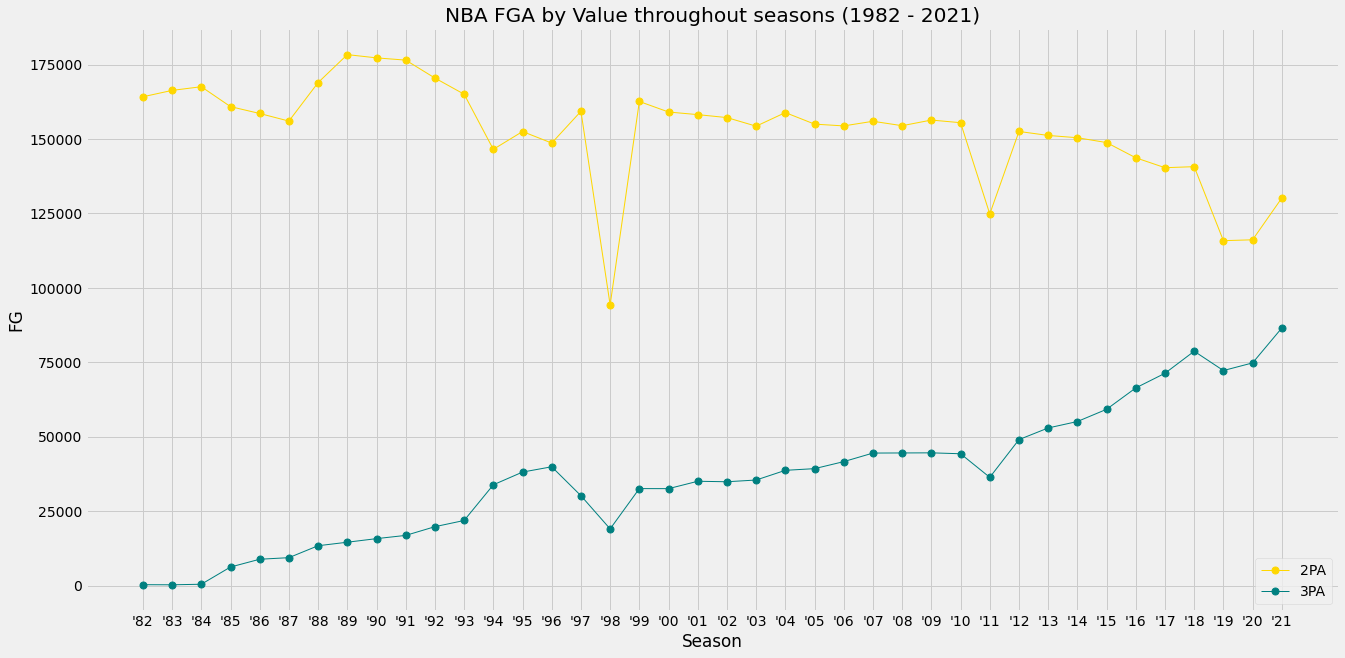

In [22]:
Fg_plot2(TwoPA_season_df, ThreePA_season_df)

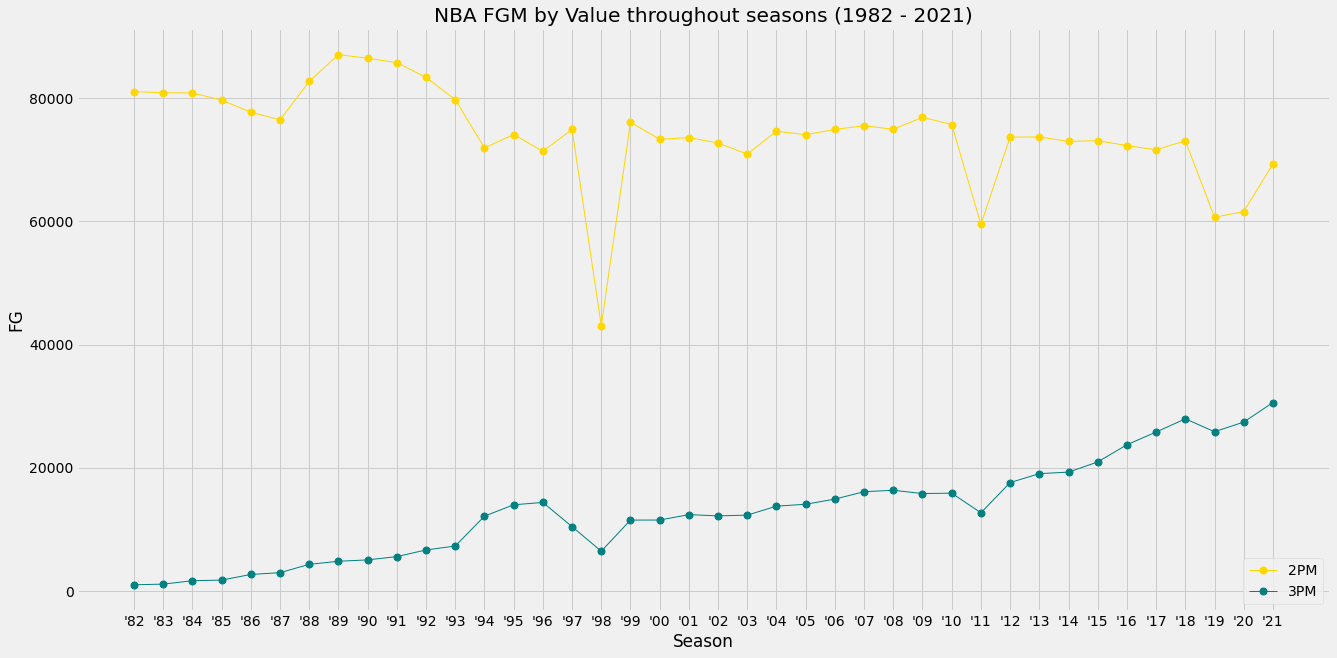

In [23]:
Fg_plot2_(TwoPM_season_df, ThreePM_season_df)

- <span style="color:gold"> Two Pointers

- <span style="color:teal"> Three Pointers

In [24]:
three_miss_pct = pd.DataFrame(list(zip(yrs[3:],(ThreePA_season_df['3PA'][3:] - ThreePM_season_df['3PM'][3:]) / ThreePA_season_df['3PA'][3:] * 100)), columns=['Year', 'Miss%'])
three_miss_pct;

In [25]:
def Three_miss_pct_plot(three_miss_pct):
    plt.figure(figsize=(28, 11))
    plt.plot(three_miss_pct['Year'], three_miss_pct['Miss%'], color='teal', label='3FG%', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='teal', markersize=7)
    
    plt.xlabel('Season')
    plt.ylabel('FG')
    plt.title('NBA Missed 3FG% throughout seasons (1982 - 2021)')
    plt.axis('tight')
    plt.legend(loc='lower right')
    plt.show()

### <p style="text-align: center;"> Total Three-Pointers Missed Percentage

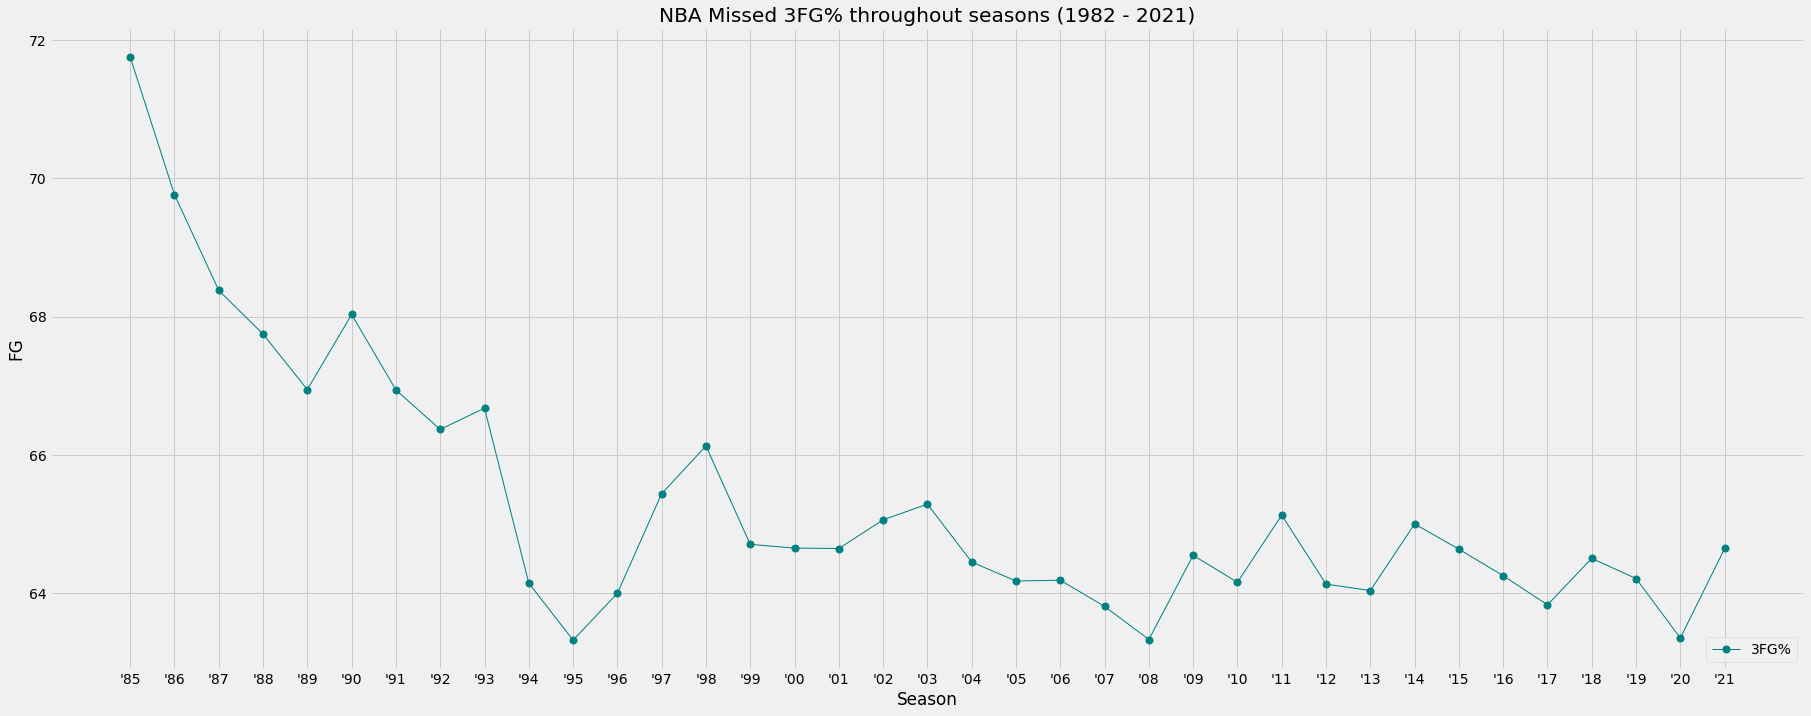

In [26]:
Three_miss_pct_plot(three_miss_pct)

### <p style="text-align: center;"> The Future?

Over the years more and more three point shots were taken

Moreover the miss rate is decreased

It's seems that the league is moving toward a **style** of game more **distant** from the basket

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 25%;"
    src="https://media.giphy.com/media/RKa0Kahmst7RooVLmA/giphy.gif?cid=ecf05e47jg3bmqlfj618zrdn38akyzx3s4p2267bm52ey1pt&rid=giphy.gif&ct=g">
</img>

### <p style="text-align: center;"> Goodbye Two-Pointers 👋🏻

*Three-Pointers* production has come to the **expense** of *Two-Pointers*

. . . Does it means that **every** shot worthing two points is *'dead'*? 💭

. . . Does it means that every shot worthing three points it's **worth** to be taken? 💭

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 20%;"
    src="https://media.giphy.com/media/QLtI0CxK8iGceO9Sja/giphy.gif?cid=ecf05e474vq6o2ku2czoy0pb78kmf63yjvpxhrk87xb7fi7t&rid=giphy.gif&ct=g">
</img>

### <p style="text-align: center;"> Not so Fast ✋🏻

We have seen that is actually possible to **increase points production** with the **same level** of 'skills' or **effective scoring percentages**

**Accurate** midrange shots with percentages above 50% are still **efficient** and **valuable**

**Lower percentages** midrange shots have value **against** the **shot clock**, that is when the possession's time of 24 seconds is almost up

Midrange shots have **meta-game** value when the **defense** have to **adjust** to cover the shot, allowing for drives to the basket, free throws oppurtunities and players left unguarded

## <p style="text-align: center;"> **Main Targets of the Project** 🔍

- <span style="color:darkturquoise"> ***Most efficient Field Goal 〰***
- *Change in Three-Pointers Style of Game of Modern NBA*
- *Change in Triple Double Style of Game of Modern NBA*
- *Rookie of the Year Prediction*
- *Game Simulation*
- *Playoffs Simulation*
- *Players Clustering*
- *Most Valuable Player Prediction*

---
**<p style="text-align: center;">*Most Efficient Type of Shot* 🎯**

---

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 45%;"
    src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.yuo1DeS7UFrXqBi8kIydMQHaE8%26pid%3DApi&f=1">
</img>

In [27]:
# 2021-22 Season Most Efficient Shot
shotloc = leaguedashteamshotlocations.LeagueDashTeamShotLocations(season='2021-22').get_data_frames()[0]
# shotloc

In [28]:
RA = shotloc['Restricted Area']
Paint = shotloc['In The Paint (Non-RA)']
Mid = shotloc['Mid-Range']
LeftCorner3 = shotloc['Left Corner 3']
RightCorner3 = shotloc['Right Corner 3']
AboveBreak3 = shotloc['Above the Break 3']
Back = shotloc['Backcourt']

In [29]:
RA_eFG = round(RA['FG_PCT'].mean()*100, 1)
Paint_eFG = round(Paint['FG_PCT'].mean()*100, 1)
Mid_eFG = round(Mid['FG_PCT'].mean()*100, 1)
LeftCorner3_eFG = round(LeftCorner3['FG_PCT'].mean()*150, 1)
RightCorner3_eFG = round(RightCorner3['FG_PCT'].mean()*150, 1)
AboveBreak3_eFG = round(AboveBreak3['FG_PCT'].mean()*150, 1)
Back_eFG = round(Back['FG_PCT'].mean()*150, 1)

In [30]:
Efficiency_Shots = [("RA",RA_eFG), ("Paint",Paint_eFG), ("Mid",Mid_eFG), ("LeftCorner3",LeftCorner3_eFG), ("RightCorner3",RightCorner3_eFG), ("AboveBreak3",AboveBreak3_eFG), ("Backcourt",Back_eFG)]
Efficiency_Shots = pd.DataFrame(sorted(Efficiency_Shots, key=lambda x: x[1],reverse=True), columns=['Location', 'eFG%'])
# Efficiency_Shots

In [31]:
def draw_court_eFG(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    centerlower_outer_arc = Arc((0, 422.5), -120, -120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    centerlower_inner_arc = Arc((0, 422.5), -40, -40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    # Colored Court
    center_inner_circle = Circle((0, 422.5), radius=20, color='tab:blue', fill=True)

    center_outer_circle = Circle((0, 422.5), radius=60, color='tab:cyan', fill=True)
    
    # eFG Percentages
    RA_draw = Circle((0, 0), radius = 40, color='lavenderblush', fill=True)

    LC3_draw = Rectangle((-220, -47.5), -30, 140, linewidth=lw, color='palegreen', fill=True)

    RC3_draw = Rectangle((220, -47.5), 30, 140, linewidth=lw, color='lightcoral', fill=True)

    Paint_draw = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color='lightyellow', fill=True)

    AboveBreak_draw = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color='azure', fill=True)

    Mid_draw = Circle((0,0), radius=238, color='ivory', fill=True)

    Backcourt = Rectangle((-250, 422.5), 500, 60, linewidth=lw, color='whitesmoke', fill=True)

    # List of the court elements to be plotted onto the axes
    court_elements = [Backcourt, AboveBreak_draw, Mid_draw, LC3_draw, RC3_draw, Paint_draw, RA_draw,
                    hoop, backboard, outer_box, inner_box, top_free_throw,
                    bottom_free_throw, restricted, corner_three_a,
                    corner_three_b, three_arc, center_outer_circle, 
                    center_inner_circle, center_outer_arc,
                    center_inner_arc, centerlower_inner_arc, centerlower_outer_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [32]:
PaintFGM,PaintFGA,MidFGM,MidFGA,ThreeFGM,ThreeFGA,TotAttl,TotMadel = [],[],[],[],[],[],[],[]

PaintAttPCT,PaintMadePCT,MidAttPCT,MidMadePCT,ThreeAttPCT,ThreeMadePCT = [],[],[],[],[],[]

RA_eFG,Paint_eFG,Mid_eFG,LeftCorner3_eFG,RightCorner3_eFG,AboveBreak3_eFG,Back_eFG = [],[],[],[],[],[],[]

PaintMadeRatio, MidMadeRatio, ThreeMadeRatio,ThreeMadeRatioEffective, TwoPointersEff = [],[],[],[],[]

year = 1996
yrs = []
while year != 2022:
    shotloc_log = leaguedashteamshotlocations.LeagueDashTeamShotLocations(season=str(year)+'-'+str(year+1)[2:])
    time.sleep(.50)
    shotloc = shotloc_log.get_data_frames()[0]    
    RA = shotloc['Restricted Area']
    Paint = shotloc['In The Paint (Non-RA)']
    Mid = shotloc['Mid-Range']
    LeftCorner3 = shotloc['Left Corner 3']
    RightCorner3 = shotloc['Right Corner 3']
    AboveBreak3 = shotloc['Above the Break 3']
    Back = shotloc['Backcourt']

    PaintMade = RA['FGM'].sum() + Paint['FGM'].sum()
    PaintAtt = RA['FGA'].sum() + Paint['FGA'].sum()
    MidMade = Mid['FGM'].sum()
    MidAtt = Mid['FGA'].sum()
    ThreeMade = LeftCorner3['FGM'].sum() + RightCorner3['FGM'].sum() + AboveBreak3['FGM'].sum() + Back['FGM'].sum()
    ThreeAtt = LeftCorner3['FGA'].sum() + RightCorner3['FGA'].sum() + AboveBreak3['FGA'].sum() + Back['FGA'].sum()
    TotMade = PaintMade + MidMade + ThreeMade
    TotAtt = PaintAtt + MidAtt + ThreeAtt

    PaintFGM.append(PaintMade)
    PaintFGA.append(PaintAtt)
    MidFGM.append(MidMade)
    MidFGA.append(MidAtt)
    ThreeFGM.append(ThreeMade)
    ThreeFGA.append(ThreeAtt)
    TotMadel.append(TotAtt)
    TotAttl.append(TotMade)

    PaintAttPCT.append(PaintAtt / TotAtt * 100)
    PaintMadePCT.append(PaintMade / TotMade * 100)
    MidAttPCT.append(MidAtt / TotAtt * 100)
    MidMadePCT.append(MidMade / TotMade * 100)
    ThreeAttPCT.append(ThreeAtt / TotAtt * 100)
    ThreeMadePCT.append(ThreeMade / TotMade * 100)

    PaintMadeRatio.append(PaintMade / PaintAtt * 100)
    MidMadeRatio.append(MidMade / MidAtt * 100)
    ThreeMadeRatio.append(ThreeMade / ThreeAtt * 100)
    #eFG%
    ThreeMadeRatioEffective.append(ThreeMade*1.5 / ThreeAtt * 100)
    TwoPointersEff.append((PaintMade + MidMade) / (PaintAtt + MidAtt) * 100)

    RA_eFG.append(round(RA['FG_PCT'].mean()*100, 1))
    Paint_eFG.append(round(Paint['FG_PCT'].mean()*100, 1))
    Mid_eFG.append(round(Mid['FG_PCT'].mean()*100, 1))
    LeftCorner3_eFG.append(round(LeftCorner3['FG_PCT'].mean()*150, 1))
    RightCorner3_eFG.append(round(RightCorner3['FG_PCT'].mean()*150, 1))
    AboveBreak3_eFG.append(round(AboveBreak3['FG_PCT'].mean()*150, 1))
    Back_eFG.append(round(Back['FG_PCT'].mean()*150, 1))
    
    yrs.append("'"+str(year)[2:])
    year += 1

In [33]:
RA_eFG_df = pd.DataFrame(list(zip(yrs, RA_eFG)), columns=['Year', 'eFG%'])
Paint_eFG_df = pd.DataFrame(list(zip(yrs, Paint_eFG)), columns=['Year', 'eFG%'])
Mid_eFG_df = pd.DataFrame(list(zip(yrs, Mid_eFG)), columns=['Year', 'eFG%'])
LeftCorner3_eFG_df = pd.DataFrame(list(zip(yrs, LeftCorner3_eFG)), columns=['Year', 'eFG%'])
RightCorner3_eFG_df = pd.DataFrame(list(zip(yrs, RightCorner3_eFG)), columns=['Year', 'eFG%'])
AboveBreak3_eFG_df = pd.DataFrame(list(zip(yrs, AboveBreak3_eFG)), columns=['Year', 'eFG%'])
Back_eFG_df = pd.DataFrame(list(zip(yrs, Back_eFG)), columns=['Year', 'eFG%'])

In [34]:
def shotplot21():
    plt.figure(figsize=(12,11))
    draw_court_eFG(outer_lines=True)
    plt.text(-20, 25, "65.4%", fontsize=20, color='limegreen', font='serif')
    plt.text(-250, 50, "57.6%", fontsize=20, color='yellowgreen', font='serif')
    plt.text(220, 50, "57.1%", fontsize=20, color='greenyellow', font='serif')
    plt.text(-20, 300, "51.9%", fontsize=20, color='yellow', font='serif')
    plt.text(-20, 120, "42.6%", fontsize=20, color='orange', font='serif')
    plt.text(120, 75, "40.1%", fontsize=20, color='orangered', font='serif')
    plt.text(-150, 450, "3.7%", fontsize=20, color='darkred', font='serif')
    plt.text(-50, -50, "2021-22 Shot Efficiency", fontsize=20, color='darkcyan', font='serif')

    plt.xlim(-265,265)
    plt.ylim(500, -47.5)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.savefig("Imgs/ShotEfficiency_plot.png")

### <p style="text-align: center">. . . What was the shot efficiency from the different zones last season? 💭

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 55%;"
    src="https://static01.nyt.com/images/2017/11/07/sports/07hardenWEB1/07hardenWEB1-articleLarge.jpg?quality=75&auto=webp&disable=upscale">
</img>

In [35]:
# shotplot21();

### <p style="text-align: center;"> 2021-22 Season Field Goal Efficiency by Zone

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 48%;"
    src="https://drive.google.com/uc?id=154bvANSwg89sG-nzqOfPrQNskuHj0L_h">
</img>

In [36]:
                                                 # Illustrative Code

# Getting the 2021-22 stats: FGM, FGA, FG_PCT.  They are classified by zone: Restricted Area, In The Paint (Non-RA), Mid-Range...
shotloc_ = leaguedashteamshotlocations.LeagueDashTeamShotLocations(season='2021-22').get_data_frames()[0]

# Dividing the main Dataframe into zone-based ones
RA_ = shotloc_['Restricted Area']
Paint_ = shotloc_['In The Paint (Non-RA)']
Mid_ = shotloc_['Mid-Range']

# Getting eFG% for each zone
RA_eFG_ = round(RA_['FG_PCT'].mean()*100, 1)
Paint_eFG_ = round(Paint_['FG_PCT'].mean()*100, 1)
Mid_eFG_ = round(Mid_['FG_PCT'].mean()*100, 1)
    
RA_eFG_, Paint_eFG_, Mid_eFG_

(65.4, 42.6, 40.1)

### <p style="text-align: center">. . . What was the shot efficiency from the different zones in NBA history? 💭
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 65%;"
    src="https://dailysnark.com/wp-content/uploads/2014/06/nba_jordan_02-1024x640.jpg">
</img>

In [37]:
def eFg_plot2(RA_eFG_df, Paint_eFG_df, Mid_eFG_df, LeftCorner3_eFG_df, RightCorner3_eFG_df, AboveBreak3_eFG_df, Back_eFG_df):
    plt.figure(figsize=(24, 10))

    plt.plot(RA_eFG_df['Year'], RA_eFG_df['eFG%'], color='teal', linestyle='-', linewidth = 1,
            marker='o', markerfacecolor='teal', markersize=7, label='Restricted Area')

    plt.plot(Paint_eFG_df['Year'], Paint_eFG_df['eFG%'], color='silver', linestyle='-', linewidth = 1,
            marker='o', markerfacecolor='silver', markersize=7, label='Paint')

    plt.plot(Mid_eFG_df['Year'], Mid_eFG_df['eFG%'], color='mediumspringgreen', linestyle='-', linewidth = 1,
            marker='o', markerfacecolor='mediumspringgreen', markersize=7, label='Mid-Range')

    plt.plot(LeftCorner3_eFG_df['Year'], LeftCorner3_eFG_df['eFG%'], color='coral', linestyle='-', linewidth = 1,
            marker='o', markerfacecolor='coral', markersize=7, label='Left Corner 3')

    plt.plot(RightCorner3_eFG_df['Year'], RightCorner3_eFG_df['eFG%'], color='yellow', linestyle='-', linewidth = 1,
            marker='o', markerfacecolor='yellow', markersize=7, label='Right Corner 3')

    plt.plot(AboveBreak3_eFG_df['Year'], AboveBreak3_eFG_df['eFG%'], color='magenta', linestyle='-', linewidth = 1,
            marker='o', markerfacecolor='magenta', markersize=7, label='Above Break 3')

    plt.plot(Back_eFG_df['Year'], Back_eFG_df['eFG%'], color='midnightblue', linestyle='-', linewidth = 1,
            marker='o', markerfacecolor='midnightblue', markersize=7, label='Backcourt')
        
    plt.xlabel('Year')
    plt.ylabel('eFG%')
    plt.title('NBA eFG% (by zone) throughout seasons (1996 - 2021)')
    plt.axis('tight')
    plt.legend(loc='lower left')
    plt.savefig("Imgs/eFG%_plot.png")
    plt.show()

### <p style="text-align: center;"> Effective Field Goal Percentage by Zone

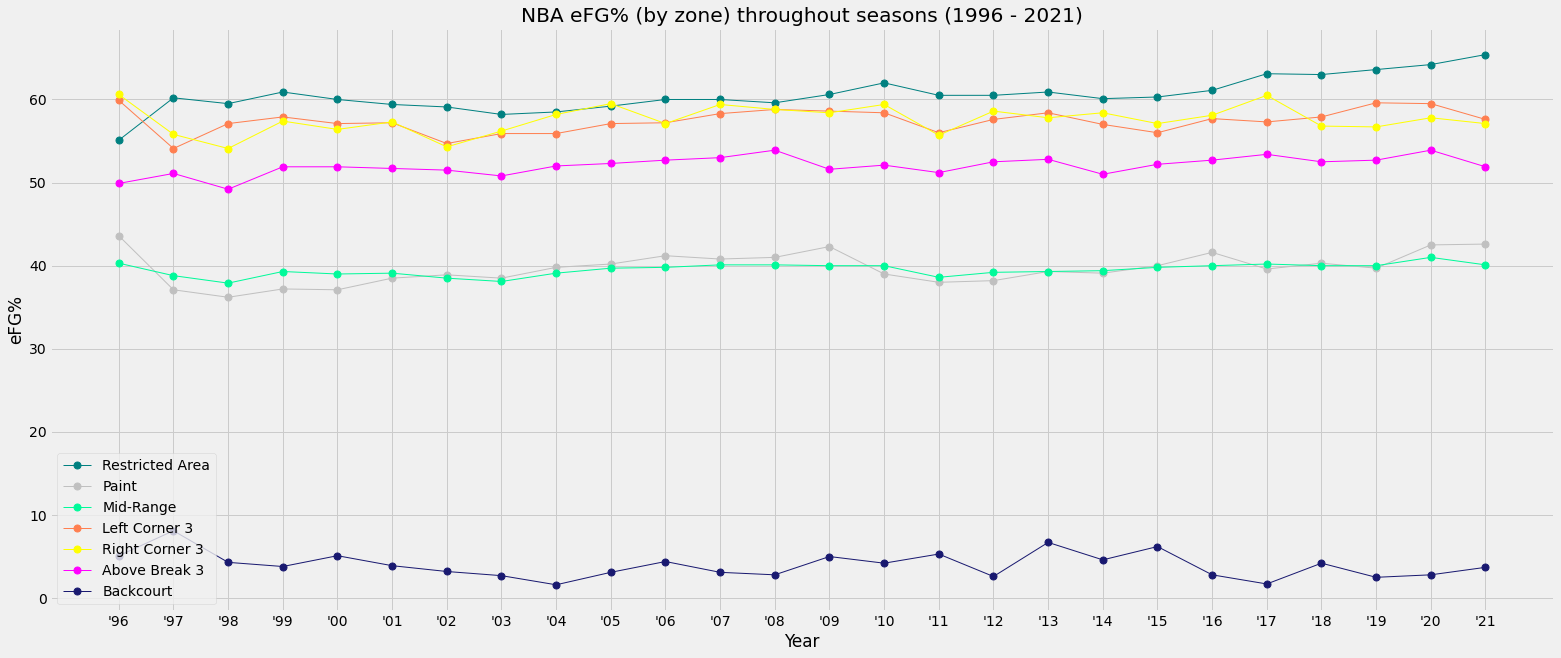

In [38]:
eFg_plot2(RA_eFG_df, Paint_eFG_df, Mid_eFG_df, LeftCorner3_eFG_df, RightCorner3_eFG_df, AboveBreak3_eFG_df, Back_eFG_df)

In [39]:
                                                 # Illustrative Code
    
RA_eFG_, Paint_eFG_, Mid_eFG_ = [], [], []
years = ['2019-20', '2020-21', '2021-22']

for year in years:
    
    # Getting the 2021-22 stats: FGM, FGA, FG_PCT.  They are classified by zone: Restricted Area, In The Paint (Non-RA), Mid-Range...
    shotloc_ = leaguedashteamshotlocations.LeagueDashTeamShotLocations(season=year).get_data_frames()[0]

    # Dividing the main Dataframe into zone-based ones
    RA_ = shotloc_['Restricted Area']
    Paint_ = shotloc_['In The Paint (Non-RA)']
    Mid_ = shotloc_['Mid-Range']

    # Getting eFG% for each zone
    RA_eFG_.append(round(RA_['FG_PCT'].mean()*100, 1))
    Paint_eFG_.append(round(Paint_['FG_PCT'].mean()*100, 1))
    Mid_eFG_.append(round(Mid_['FG_PCT'].mean()*100, 1)) 
    
print(f"   Season  \t  {Fore.CYAN} RA \t {Fore.WHITE} FGM \t  {Fore.GREEN} Mid \n {Fore.RESET}")
for i in range(3):
    print(f"  {years[i]}: \t {Fore.CYAN}{RA_eFG_[i]}  \t  {Fore.WHITE}{Paint_eFG_[i]}     {Fore.GREEN}{Mid_eFG_[i]} \n {Fore.RESET}")

   Season  	   RA 	  FGM 	   Mid 
 
  2019-20: 	 63.6  	  39.7     40.0 
 
  2020-21: 	 64.2  	  42.5     41.0 
 
  2021-22: 	 65.4  	  42.6     40.1 
 


#  <p style="text-align: center;"> We have a clear winner 🎉

###  <p style="text-align: center;"> Backcourt Threes 🥇

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 35%;"
    src="https://media.tenor.co/images/d2937873a284e5008fd4ddc98976c721/raw">
</img>

### <p style="text-align: center;"> Most Efficient shots 🎯
    
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 25%;"
    src="https://drive.google.com/uc?id=154bvANSwg89sG-nzqOfPrQNskuHj0L_h">
</img>

- *The **Most Effcient shot** is from the* ***Restricted Area***🏆

- *The **Second Most Efficient** is the* ***Three-Point shot*** 🥈

- *The **Third Efficient** is the* ***in-the-Paint shot*** 🥉

### <img align="left" width="500" src="https://www.lakemichigancollege.edu/sites/default/files/2018-02/CISBanner2048X1152.jpg"><p style="text-align: center;">Data Transforming the NBA<img align="right" width="500" src="https://insidescience.org/sites/default/files/sites/all/default/files/SecondSpectrumTracking.jpg">

Knowing that three-pointers are more valuable than long midrange shots, teams have started to **adjust their offense** to create more and more three points shots **opportunities**

This knowledge has certainly been reached through **data production** and **data analytics** that in the past were not available

But there could be *another reason* why 3-points shots are nowadays getting so much *attention* and *hype* around . . .  

## <p style="text-align: center;"> **Main Targets of the Project** 🔍
- <span style="color:lightgreen"> ***Most efficient Field Goal ✔***
- <span style="color:darkturquoise"> ***Change in Three-Pointers Style of Game of Modern NBA 〰***
- *Change in Triple Double Style of Game of Modern NBA*
- *Rookie of the Year Prediction*
- *Game Simulation*
- *Playoffs Simulation*
- *Players Clustering*
- *Most Valuable Player Prediction*

---
**<p style="text-align: center;">*Three-Pointers Era***

---

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 45%;"
    src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.mSEtt3EqZooPrwJJBsrsYgHaFD%26pid%3DApi&f=1">
</img>

In [40]:
TwoPM_SeasonPercent = TwoPM_season_df['2PM'] / FGM_season_df['FGM'] * 100
ThreePM_SeasonPercent = ThreePM_season_df['3PM'] / FGM_season_df['FGM'] * 100
TwoPA_SeasonPercent = TwoPA_season_df['2PA'] / FGA_season_df['FGA'] * 100
ThreePA_SeasonPercent = ThreePA_season_df['3PA'] / FGA_season_df['FGA'] * 100

In [41]:
TwoPM_SeasonPercent_df = pd.DataFrame(list(zip(yrs, TwoPM_SeasonPercent)), columns=['Year', 'FG%'])
ThreePM_SeasonPercent_df = pd.DataFrame(list(zip(yrs, ThreePM_SeasonPercent)), columns=['Year', 'FG%'])
TwoPA_SeasonPercent_df = pd.DataFrame(list(zip(yrs, TwoPA_SeasonPercent)), columns=['Year', 'FG%'])
ThreePA_SeasonPercent_df = pd.DataFrame(list(zip(yrs, ThreePA_SeasonPercent)), columns=['Year', 'FG%'])

In [42]:
def FG_Percent_plot(TwoPM_SeasonPercent_df, ThreePM_SeasonPercent_df, TwoPA_SeasonPercent_df, ThreePA_SeasonPercent_df):
    plt.figure(figsize=(28, 11))

    plt.plot(TwoPM_SeasonPercent_df['Year'], TwoPM_SeasonPercent_df['FG%'], color='orchid', label='2PM%', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='orchid', markersize=7)
    plt.plot(ThreePM_SeasonPercent_df['Year'], ThreePM_SeasonPercent_df['FG%'], color='gold', label='3PM%', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='gold', markersize=7)
    plt.plot(TwoPA_SeasonPercent_df['Year'], TwoPA_SeasonPercent_df['FG%'], color='mediumspringgreen', label='2PA%', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='mediumspringgreen', markersize=7)
    plt.plot(ThreePA_SeasonPercent_df['Year'], ThreePA_SeasonPercent_df['FG%'], color='aquamarine', label='3PA%', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='aquamarine', markersize=7)

    plt.xlabel('Season')
    plt.ylabel('FG%')
    plt.title('NBA FG% over Total (by value) throughout seasons (1982 - 2021)')
    plt.axis('tight')
    plt.legend(loc='lower right')
    plt.show()

#### <p style="text-align: center;">  Percentage of Field Goals over Total (by Value)

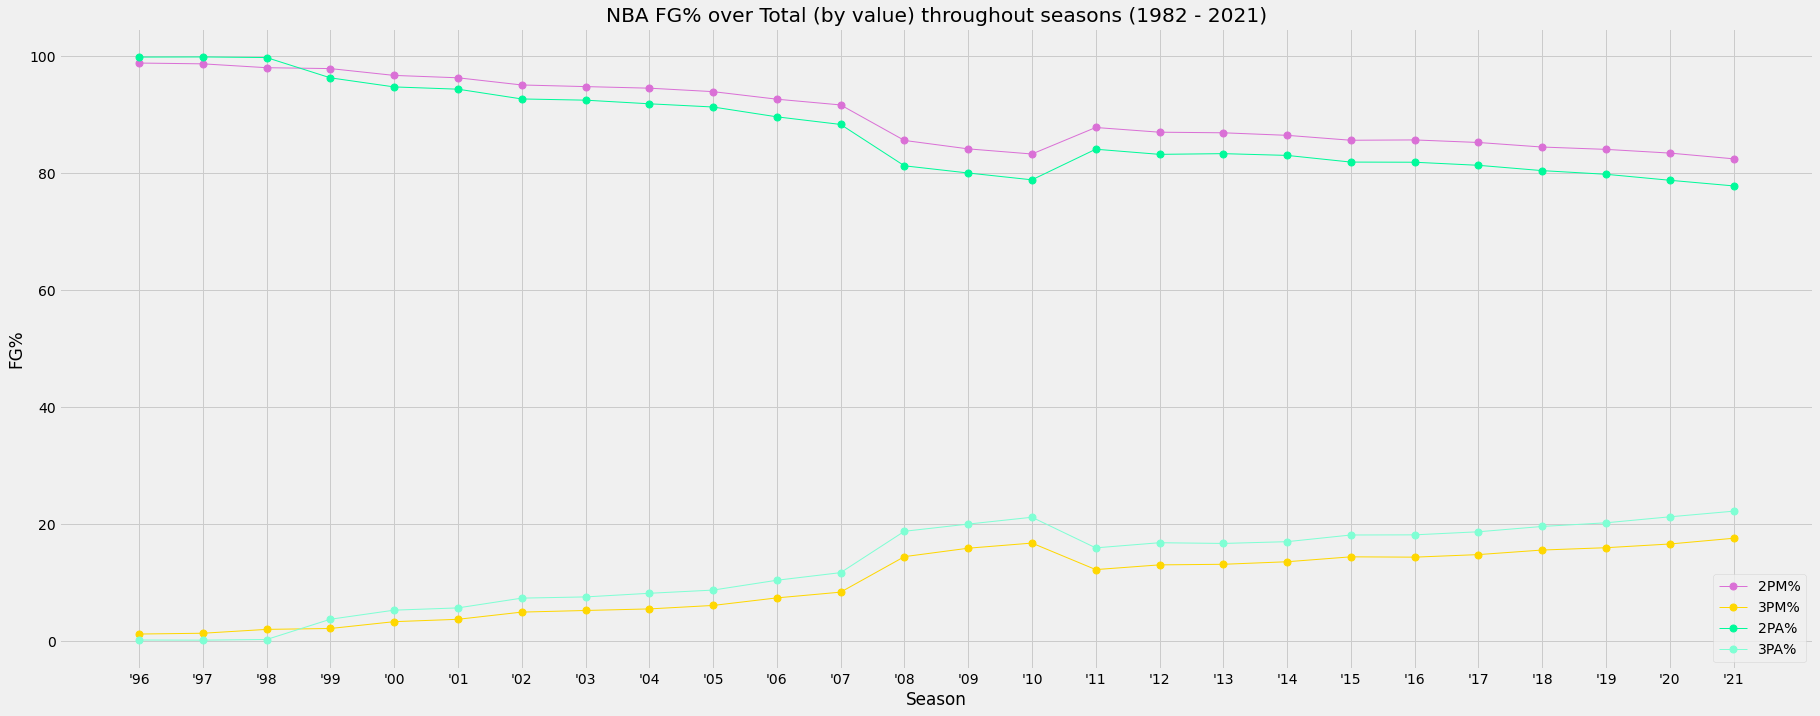

In [43]:
FG_Percent_plot(TwoPM_SeasonPercent_df, ThreePM_SeasonPercent_df, TwoPA_SeasonPercent_df, ThreePA_SeasonPercent_df)

In [44]:
PaintAtt_df = pd.DataFrame(list(zip(yrs, PaintAttPCT)), columns=['Year', 'FG%'])
MidAtt_df = pd.DataFrame(list(zip(yrs, MidAttPCT)), columns=['Year', 'FG%'])
ThreeAtt_df = pd.DataFrame(list(zip(yrs, ThreeAttPCT)), columns=['Year', 'FG%'])
ThreeAttVolume_df = pd.DataFrame(list(zip(yrs, ThreeFGA)), columns=['Year', 'FG3A'])
ThreeMadeVolume_df = pd.DataFrame(list(zip(yrs, ThreeFGM)), columns=['Year', 'FG3M'])

In [45]:
def Fga_plot(PaintAtt_df, MidAtt_df, ThreeAtt_df):
    plt.figure(figsize=(28, 11))
    plt.plot(PaintAtt_df['Year'], PaintAtt_df['FG%'], color='teal', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='teal', markersize=7, label='Paint')
    plt.plot(MidAtt_df['Year'], MidAtt_df['FG%'], color='gold', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='gold', markersize=7, label='Mid-Range')
    plt.plot(ThreeAtt_df['Year'], ThreeAtt_df['FG%'], color='mediumspringgreen', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='mediumspringgreen', markersize=7, label='3-Point')
    plt.vlines("'14", 0, ThreeAtt_df['FG%'].iloc[18], color='mediumorchid', linestyle='--', label="Curry's I MVP")

    plt.text(15, 0, "Curry's I MVP", fontsize=15, color='mediumorchid', font='serif')
    plt.xlabel('Year')
    plt.ylabel('FGA% of total FGA')
    plt.title('NBA FGA% of total FGA (by type) throughout seasons (1996 - 2021)')
    plt.axis('tight')
    plt.legend(loc='center left')
    plt.show()

In [46]:
PaintMade_df = pd.DataFrame(list(zip(yrs, PaintMadePCT)), columns=['Year', 'FG%'])
MidMade_df = pd.DataFrame(list(zip(yrs, MidMadePCT)), columns=['Year', 'FG%'])
ThreeMade_df = pd.DataFrame(list(zip(yrs, ThreeMadePCT)), columns=['Year', 'FG%'])

In [47]:
def Fgm_plot(PaintMade_df, MidMade_df, ThreeMade_df):
    plt.figure(figsize=(28, 11))
    
    plt.plot(PaintMade_df['Year'], PaintMade_df['FG%'], color='teal', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='teal', markersize=7, label='Paint')
    plt.plot(MidMade_df['Year'], MidMade_df['FG%'], color='gold', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='gold', markersize=7, label='Mid-Range')
    plt.plot(ThreeMade_df['Year'], ThreeMade_df['FG%'], color='aquamarine', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='aquamarine', markersize=7, label='3-Point')
    
    plt.vlines("'14", 0, ThreeMade_df['FG%'].iloc[18], color='mediumorchid', linestyle='--', label="Curry's I MVP")
    plt.text(15, 0, "Curry's I MVP", fontsize=15, color='mediumorchid', font='serif')
    
    plt.xlabel('Year')
    plt.ylabel('FGM% of total FGM')
    plt.title('NBA FGM% of total FGM (by type) throughout seasons (1996 - 2021)')
    plt.axis('tight')
    plt.legend(loc='upper left')
    plt.show()

### <p style="text-align: center;"> Percentage of Field Goal Attempts over Total

### <p style="text-align: center;"> Percentage of Field Goal Made over Total

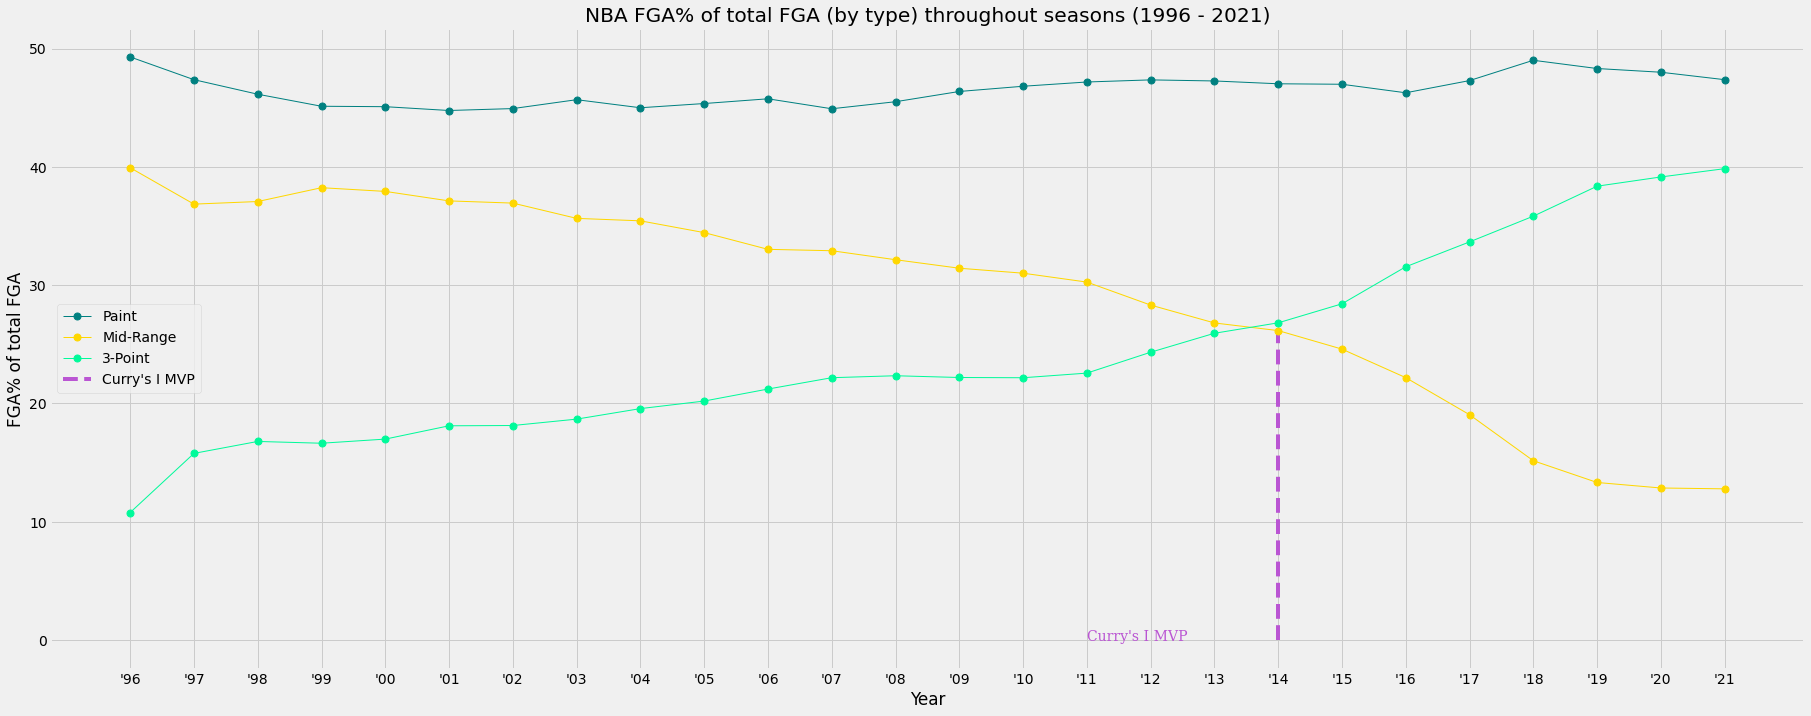

In [48]:
Fga_plot(PaintAtt_df, MidAtt_df, ThreeAtt_df)

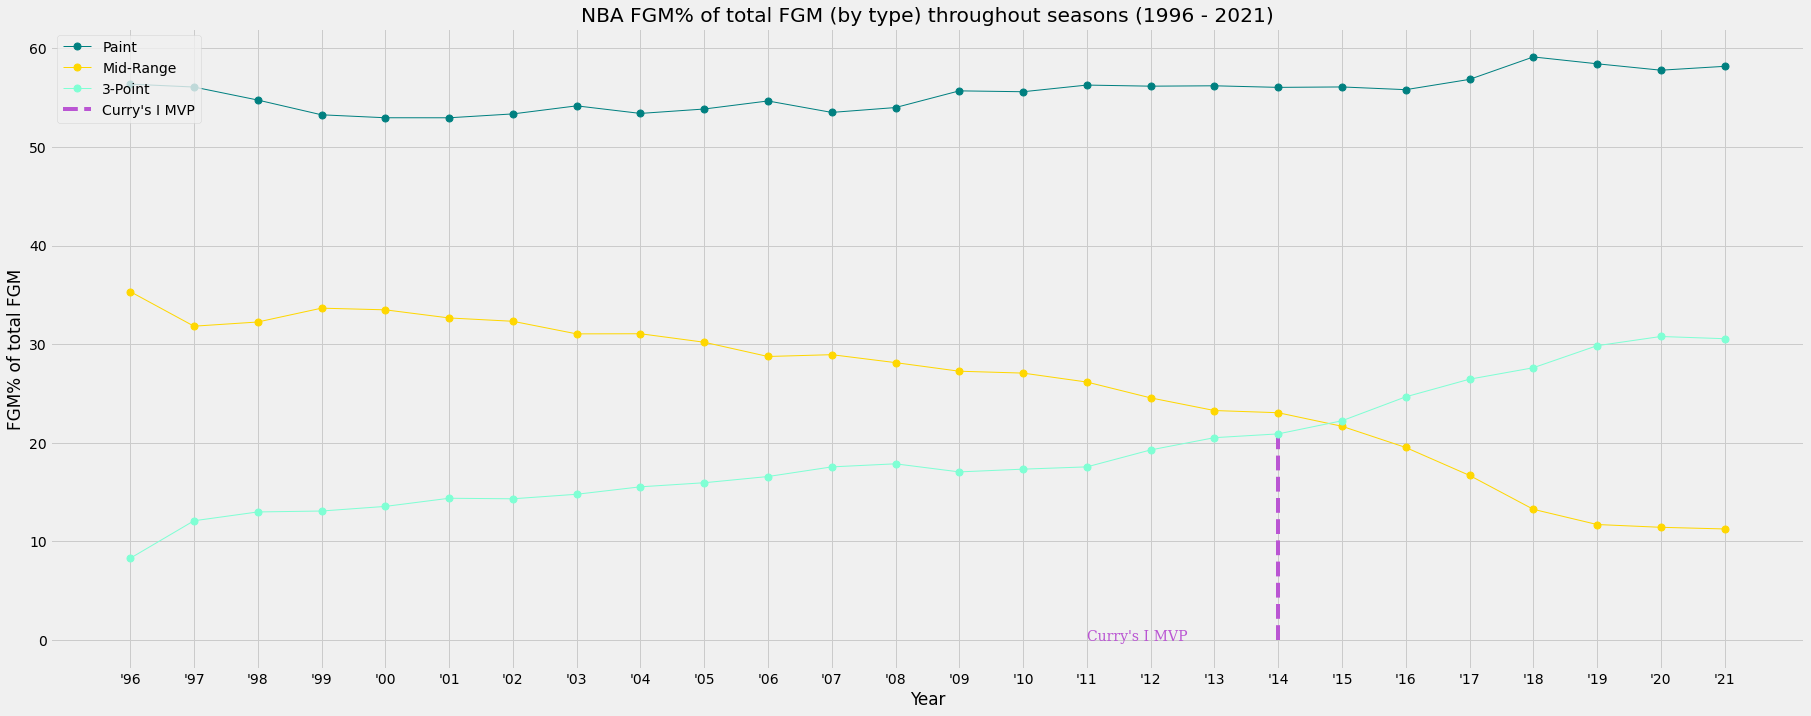

In [49]:
Fgm_plot(PaintMade_df, MidMade_df, ThreeMade_df)

- <span style="color:gold"> Mid Range

- <span style="color:aquamarine"> Three Pointers

- <span style="color:teal"> Paint

- <span style="color:mediumorchid"> Curry's I MVP (2014)

In [50]:
def ThreeAtt_plot(ThreeAttVolume_df):
    ThreeAttVolume_df.plot.bar(x='Year', y='FG3A', color='mediumspringgreen', figsize=(28, 11),
                               title="Total Three-Pointer Attempts throughout seasons (1996 - 2021)", label='3-Pointer Attempts')
    
    plt.vlines(18, 55000, 75000, color='mediumorchid', linestyle='--', label="Curry's I MVP")
    plt.text(17, 78000, "Curry's I MVP", fontsize=25, color='mediumorchid', font='serif')
    
    plt.vlines(15, 36000, 56000, color='teal', linestyle='--', label="Curry's I MVP")
    plt.text(14, 60000, "Curry's Draft", fontsize=25, color='teal', font='serif')
    
    plt.xlabel('Year')
    plt.ylabel('Three Pointer Attempts')
    plt.axis('tight')
    plt.show()

In [51]:
def ThreeMade_plot(ThreeMadeVolume_df):
    ThreeMadeVolume_df.plot.bar(x='Year', y='FG3M', color='aquamarine', figsize=(28, 11),
                                title="Total Three-Pointers Made throughout seasons (1996 - 2021)", label='3-Pointers Made')
    
    plt.vlines(18, 19000, 24000, color='mediumorchid', linestyle='--', label="Curry's I MVP")
    plt.text(17, 25000, "Curry's I MVP", fontsize=25, color='mediumorchid', font='serif')
    
    plt.vlines(15, 12500, 17500, color='teal', linestyle='--', label="Curry's I MVP")
    plt.text(14, 18500, "Curry's Draft", fontsize=25, color='teal', font='serif')
    
    plt.xlabel('Year')
    plt.ylabel('Three Pointers Made')
    plt.axis('tight')
    plt.show()

### <p style="text-align: center;"> Curry's Effect on Three-Pointers (1996 - 2021)

#### <p style="text-align: center;"> Three Point Attempts

#### <p style="text-align: center;"> Three Points Made

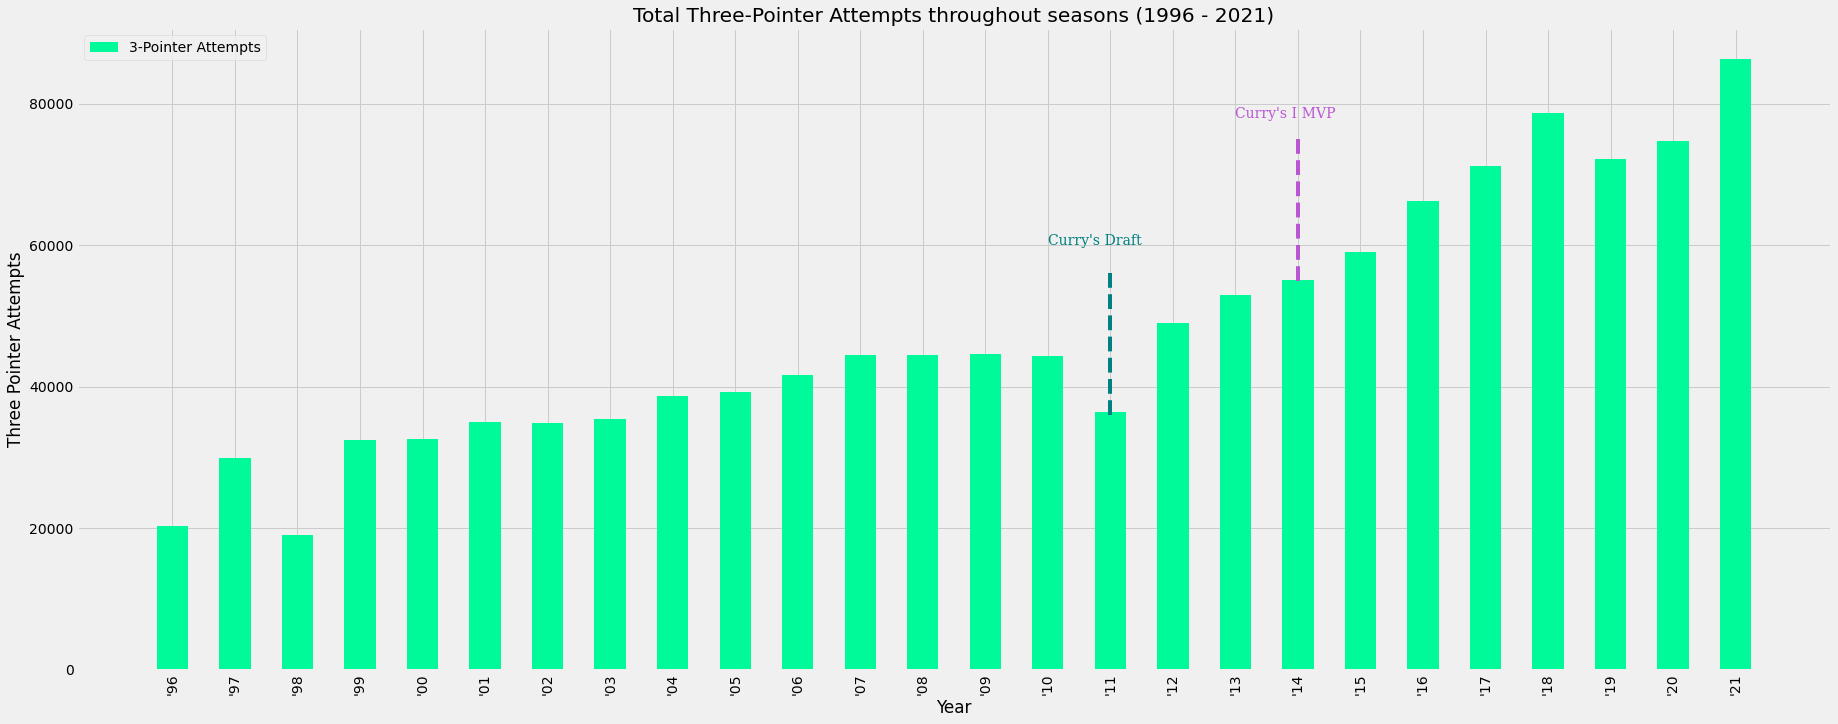

In [52]:
ThreeAtt_plot(ThreeAttVolume_df)

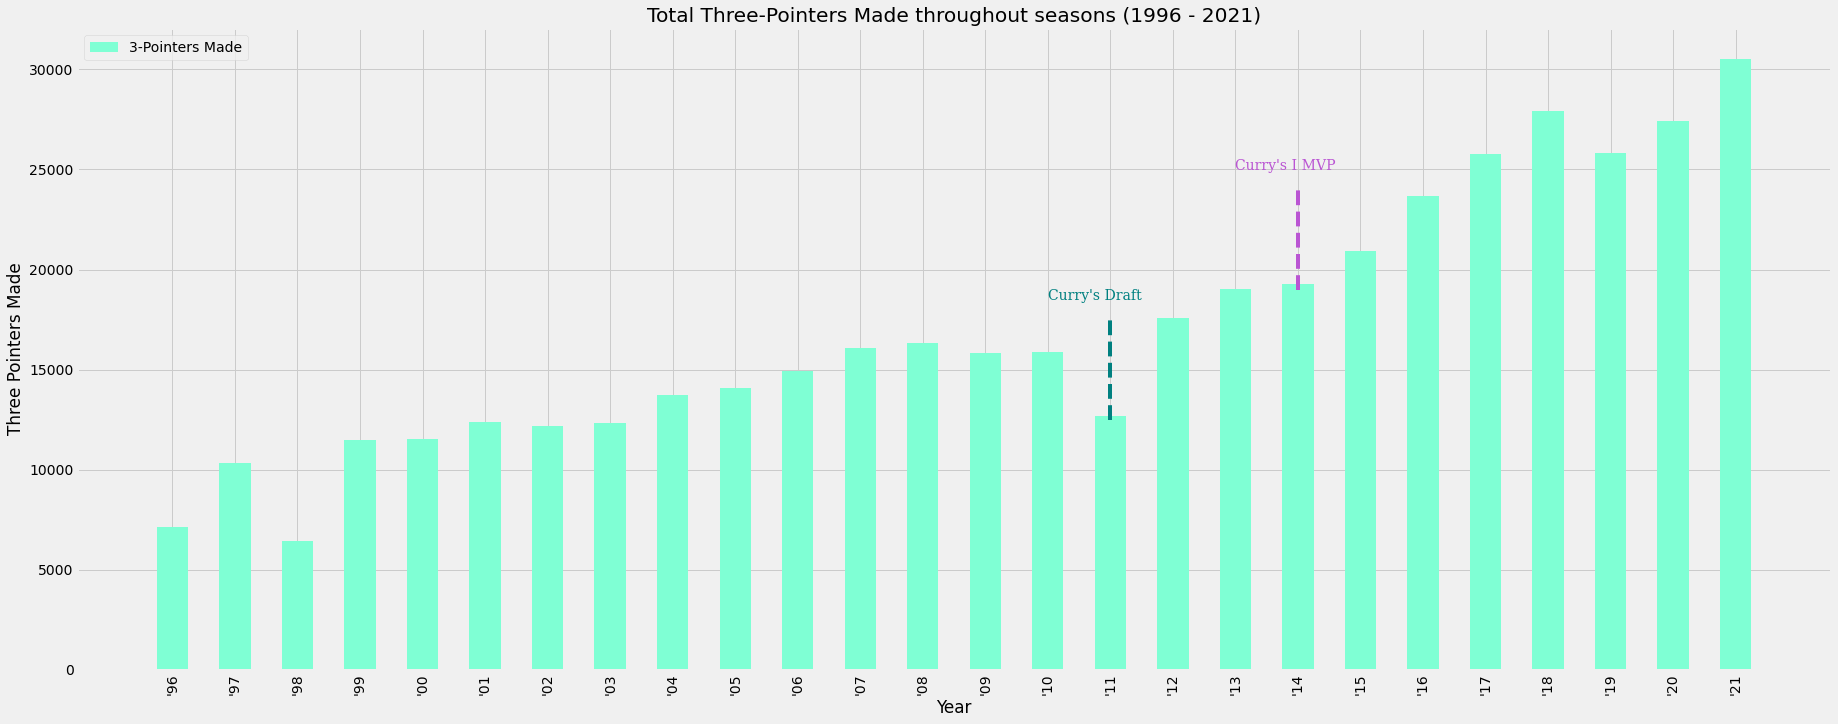

In [53]:
ThreeMade_plot(ThreeMadeVolume_df)

- <span style="color:teal"> Curry's Draft (2009)

- <span style="color:mediumorchid"> Curry's I MVP (2014)

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 50%;"
    src="https://media.giphy.com/media/3oKIPv84C9Xvd9gnks/giphy.gif?cid=ecf05e474eshpotphotlx1vpqof3q0v8plg3e4kzv4ba4o6q&rid=giphy.gif&ct=g">
</img>

In [54]:
alltimeleadersgrids.AllTimeLeadersGrids().get_data_frames()[12][["PLAYER_NAME", "FG3M", "FG3M_RANK"]]

,PLAYER_NAME,FG3M,FG3M_RANK
0,Stephen Curry,3117,1
1,Ray Allen,2973,2
2,James Harden,2593,3
3,Reggie Miller,2560,4
4,Kyle Korver,2450,5
5,Vince Carter,2290,6
6,Jason Terry,2282,7
7,Jamal Crawford,2221,8
8,Damian Lillard,2143,9
9,Paul Pierce,2143,9


<p style="text-align: center;">👑
</p><img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 30%;" src="https://cdn.nba.com/headshots/nba/latest/1040x760/201939.png">
</img>
<img align="left" width="200" src="https://cdn.nba.com/headshots/nba/latest/1040x760/951.png">
<img align="right" width="200" src="https://cdn.nba.com/headshots/nba/latest/1040x760/201935.png">

On December 14th 2021 Curry became the **leader** in Three-pointers made hitting his 2974th three point shot and overcoming Ray Allen

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 75%;"
    src="https://assets1.cbsnewsstatic.com/hub/i/r/2021/12/15/b4887f5d-0df8-452a-a1d4-ace0862ab75e/thumbnail/620x414/2b9ac99ee8798aa3e23a3ccad9ae9db1/gettyimages-1359048253.jpg">
</img>

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 90%;"
    src="https://image.cnbcfm.com/api/v1/image/106989578-1639580317868-gettyimages-1237236720-414_12142021_warriors_knicks_butler_1384.jpeg?v=1639580410&w=740&h=416">
</img>

In [55]:
# Same graphs as above but joint in one

def TotFg_plot(PaintAtt_df, PaintMade_df, MidAtt_df, MidMade_df, ThreeAtt_df, ThreeMade_df):
    plt.figure(figsize=(28, 11))

    plt.plot(PaintAtt_df['Year'], PaintAtt_df['FG%'], color='teal', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='teal', markersize=7, label='Paint FGA')
    plt.plot(PaintMade_df['Year'], PaintMade_df['FG%'], color='deepskyblue', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='deepskyblue', markersize=7, label='Paint FGM')

    plt.plot(MidAtt_df['Year'], MidAtt_df['FG%'], color='gold', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='gold', markersize=7, label='Mid-Range FGA')
    plt.plot(MidMade_df['Year'], MidMade_df['FG%'], color='yellow', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='yellow', markersize=7, label='Mid-Range FGM')

    plt.plot(ThreeAtt_df['Year'], ThreeAtt_df['FG%'], color='mediumspringgreen', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='mediumspringgreen', markersize=7, label='3-Point FGA')
    plt.plot(ThreeMade_df['Year'], ThreeMade_df['FG%'], color='aquamarine', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='aquamarine', markersize=7, label='3-Point FGM')

    plt.xlabel('Year')
    plt.ylabel('FG% of total FG')
    plt.title('NBA FG% of total FG (by type) throughout seasons (1996 - 2021)')
    plt.axis('tight')
    plt.legend(loc='upper left')
    plt.show()

### <p style="text-align: center;"> Percentage of Field Goal over Total (by Type)

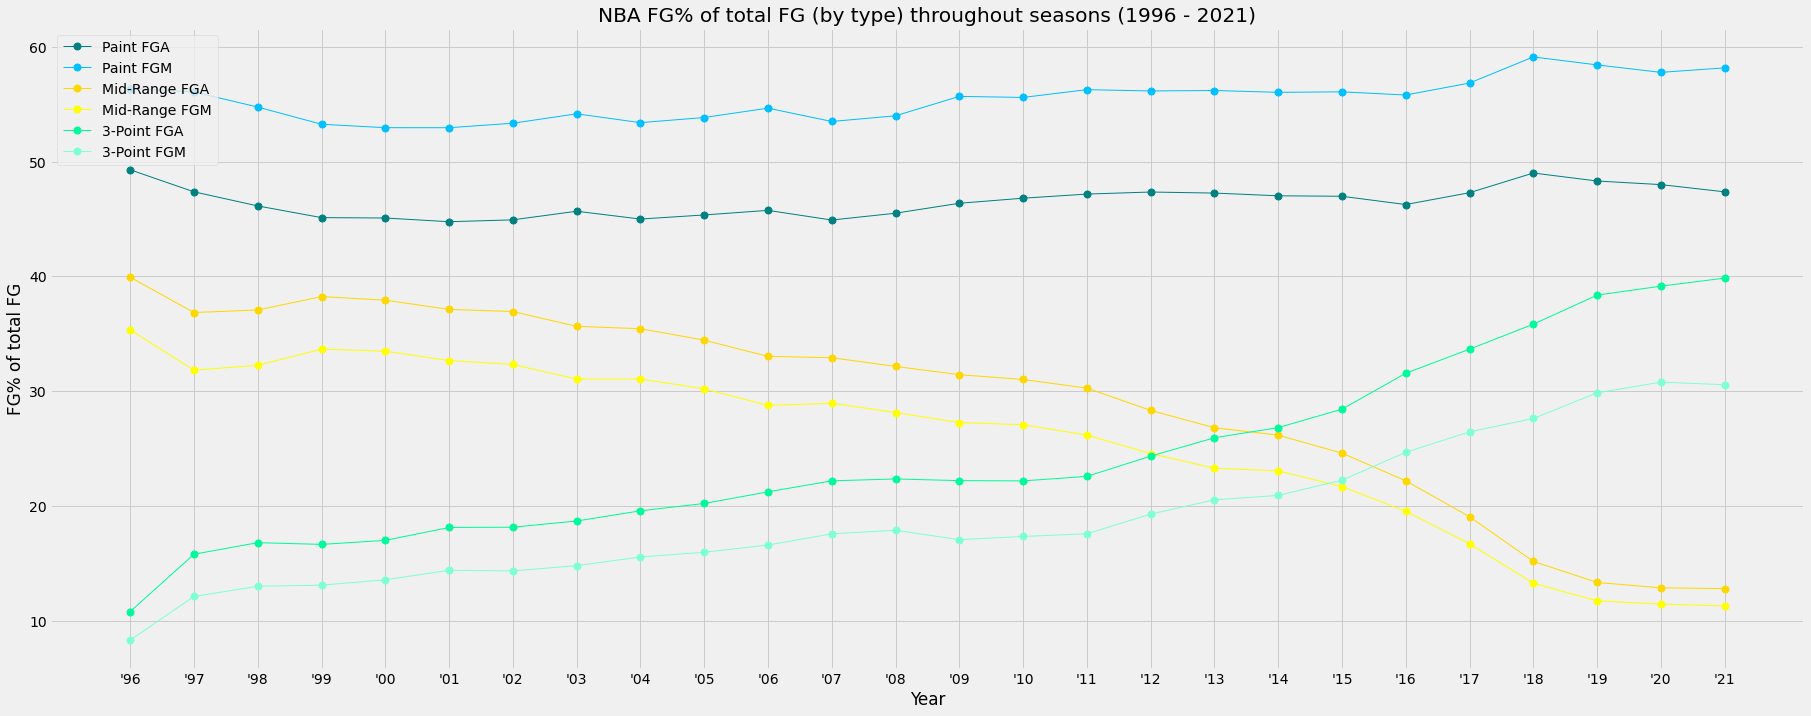

In [56]:
TotFg_plot(PaintAtt_df, PaintMade_df, MidAtt_df, MidMade_df, ThreeAtt_df, ThreeMade_df)

In [57]:
PaintMadeRatio_df = pd.DataFrame(list(zip(yrs, PaintMadeRatio)), columns=['Year', 'FG%'])
MidMadeRatio_df = pd.DataFrame(list(zip(yrs, MidMadeRatio)), columns=['Year', 'FG%'])
ThreeMadeRatio_df = pd.DataFrame(list(zip(yrs, ThreeMadeRatio)), columns=['Year', 'FG%'])
ThreeMadeRatioEffective_df = pd.DataFrame(list(zip(yrs, ThreeMadeRatioEffective)), columns=['Year', 'FG%'])

### <p style="text-align: center;"> Evolution of the Game

We have seen that in *Restricted Area* shots are the most effcient type of shots

But any three-point shot is *almost* as **efficient** as any shot *close* to the basket

Having several efficent **scoring options** has allowed the game of Basket to become so **versatile** and **dynamic**

In [58]:
def Fg_plot3(PaintMadeRatio_df, MidMadeRatio_df, ThreeMadeRatio_df, ThreeMadeRatioEffective_df):
    plt.figure(figsize=(28, 11))
    plt.plot(PaintMadeRatio_df['Year'], PaintMadeRatio_df['FG%'], color='teal', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='teal', markersize=7, label='Paint')
    plt.plot(MidMadeRatio_df['Year'], MidMadeRatio_df['FG%'], color='gold', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='gold', markersize=7, label='Mid-Range')
    plt.plot(ThreeMadeRatio_df['Year'], ThreeMadeRatio_df['FG%'], color='mediumspringgreen', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='mediumspringgreen', markersize=7, label='3-Point')
    plt.plot(ThreeMadeRatioEffective_df['Year'], ThreeMadeRatioEffective_df['FG%'], color='orchid', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='orchid', markersize=7, label='Effective 3-Point')

    plt.xlabel('Year')
    plt.ylabel('FGA%')
    plt.title('NBA FG% throughout seasons (1996 - 2021)')
    plt.axis('tight')
    plt.legend(loc='center left')
    plt.show()

### <p style="text-align: center;"> Field Goal Percentage (by Type)

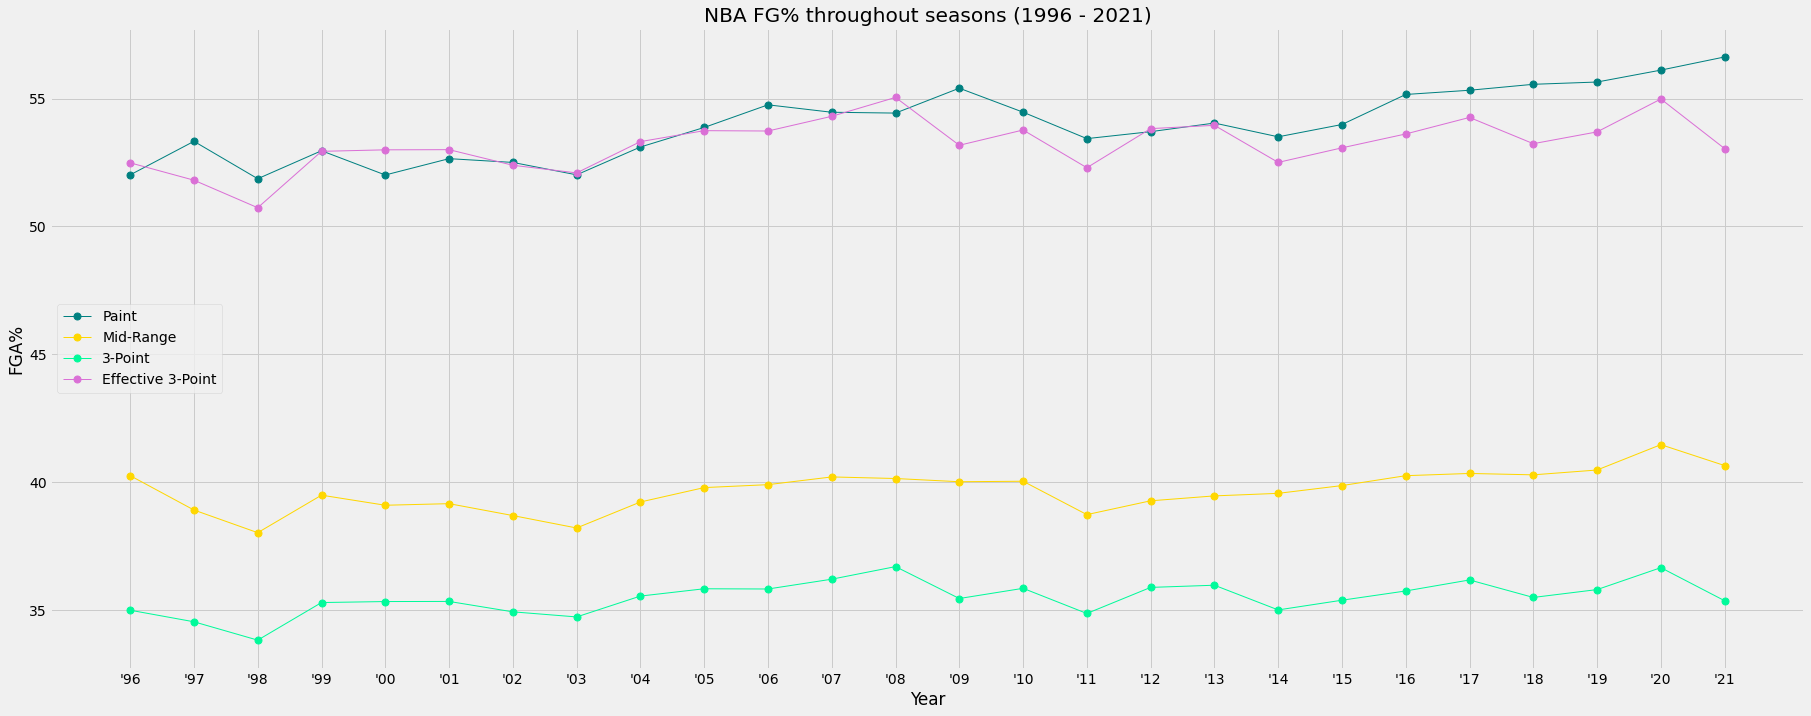

In [59]:
Fg_plot3(PaintMadeRatio_df, MidMadeRatio_df, ThreeMadeRatio_df, ThreeMadeRatioEffective_df)

In [60]:
ThreeMadeRatioEffective_df = pd.DataFrame(list(zip(yrs, ThreeMadeRatioEffective)), columns=['Year', 'eFG%'])
TwoPointersEff_df = pd.DataFrame(list(zip(yrs, TwoPointersEff)), columns=['Year', 'eFG%'])

### <p style="text-align: center;"> Evolution of the Game

Last season another **record** was set

For the **first time** in *NBA history* Two point shots were globally more efficent than Three pointers

That's because, as previously showed, Mid Range shots **production**, that is less efficient, has steadily **decreased** over seasons

In [61]:
def eFg_plot3(ThreeMadeRatioEffective_df, TwoPointersEff_df):
    plt.figure(figsize=(22, 8))
    plt.plot(ThreeMadeRatioEffective_df['Year'], ThreeMadeRatioEffective_df['eFG%'], color='teal', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='teal', markersize=7, label='Effective Three-pointers')
    plt.plot(TwoPointersEff_df['Year'], TwoPointersEff_df['eFG%'], color='gold', linestyle='-', linewidth = 1,
             marker='o', markerfacecolor='gold', markersize=7, label='Effective Two-Pointers')

    plt.xlabel('Year')
    plt.ylabel('eFG%')
    plt.title('NBA eFG% (by value) throughout seasons (1996 - 2021)')
    plt.axis('tight')
    plt.legend(loc='center left')
    plt.show()

### <p style="text-align: center;"> Effective Field Goal Percentage

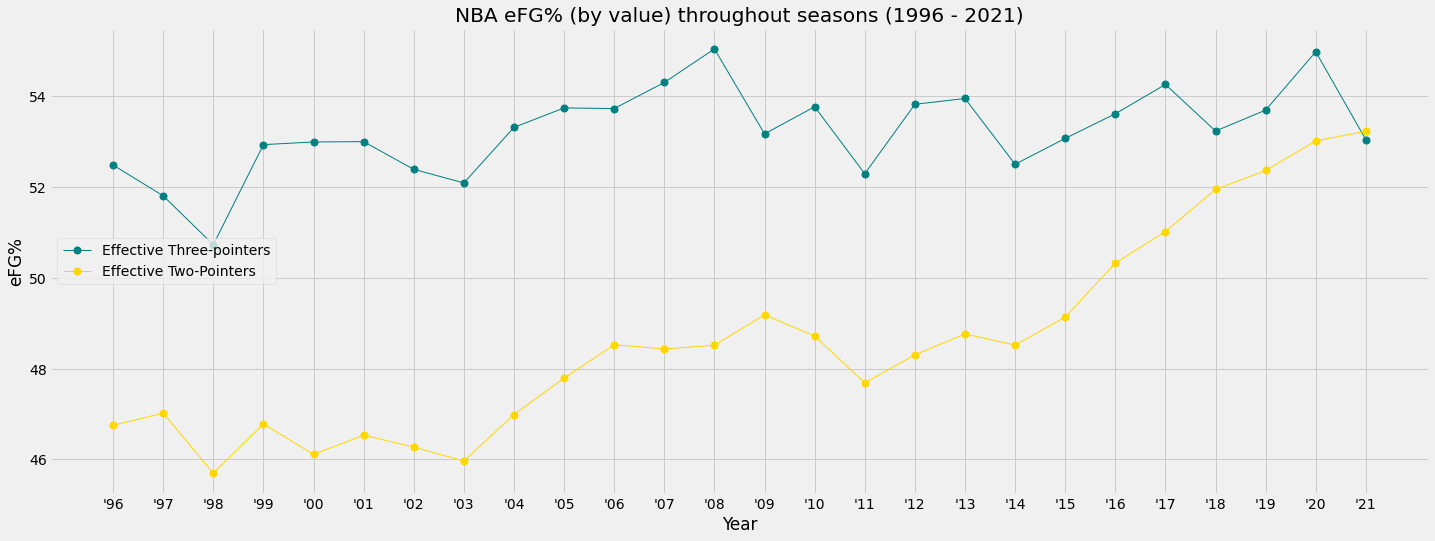

In [62]:
eFg_plot3(ThreeMadeRatioEffective_df, TwoPointersEff_df)

*2021-22 Season **first season in NBA history** in which Two-Point shots are **more valuable** than Three-Point shots*.

This may seem counter intuitive, but clearly shows how restricted-area shots are still valuable and how 2P attempts are decreasing over time

## <p style="text-align: center;"> **Main Targets of the Project** 🔍
- <span style="color:lightgreen"> ***Most efficient Field Goal ✔***
- <span style="color:lightgreen"> ***Change in Three-Pointers Style of Game of Modern NBA ✔***
- <span style="color:darkturquoise"> ***Change in Triple Double Style of Game of Modern NBA 〰***
- *Rookie of the Year Prediction*
- *Game Simulation*
- *Playoffs Simulation*    
- *Players Clustering*
- *Most Valuable Player Prediction*

---
**<p style="text-align: center;">*Triple Double Era***

---
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 25%;"
    src="https://i1.sndcdn.com/avatars-000305110507-bon4ng-t500x500.jpg">
</img>

### *. . . What is a Triple Double?* 💭

A triple Double occurs when a players records double-digit figures in at least three boxscore stats categories

. . . *Which are these categories?* 💭

The most common category is **<p style="text-align: center;">*Points Scored***

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 25%;"
    src="https://bluemanhoop.com/wp-content/uploads/getty-images/2017/07/954767442-2.jpeg">
</img>

#### <p style="text-align: center;"> Triple Double Boxscore Categories

**<p style="text-align: center;">*Assist***

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 28%;"
    src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.E-mLx_T9ndAlAHHViYHPpgEqDR%26pid%3DApi&f=1">
</img>

**<p style="text-align: center;">*Rebounds***
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 40%;"
    src="https://images.daznservices.com/di/library/NBA_Global_CMS_image_storage/d5/45/dennis-rodman_sy8gybwkojxn1qbxa66swnod0.jpeg?t=-1434392247&w=%7Bwidth%7D&quality=80">
</img>

**<p style="text-align: center;">*Steals***
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 40%;"
    src="https://d31xsmoz1lk3y3.cloudfront.net/big/2122.jpg?v=1547670909">
</img>

**<p style="text-align: center;">*Blocks***
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 40%;"
    src="https://i.ytimg.com/vi/-otiikSQRg8/maxresdefault.jpg">
</img>

In [63]:
TD_df = pd.read_csv('df\Triple Double')
#TD_df

---

In [64]:
def TD_plot(TD_df):
    TD_df.plot.bar(x='Year', y='TD', color='mediumspringgreen', figsize=(28, 11),
                    title="Westbrook's Effect on Triple Doubles", label='Triple Doubles Volume')
    plt.text(14, 140, "Westbrook's 2016 MVP", fontsize=15, color='mediumorchid', font='serif')
    plt.vlines(16, TD_df['TD'].iloc[16], TD_df['TD'].iloc[17]+20, color='mediumorchid', linestyle='--', label="Westbrook 2016 MVP")
    plt.show()

### <p style="text-align: center;"> Triple Doubles

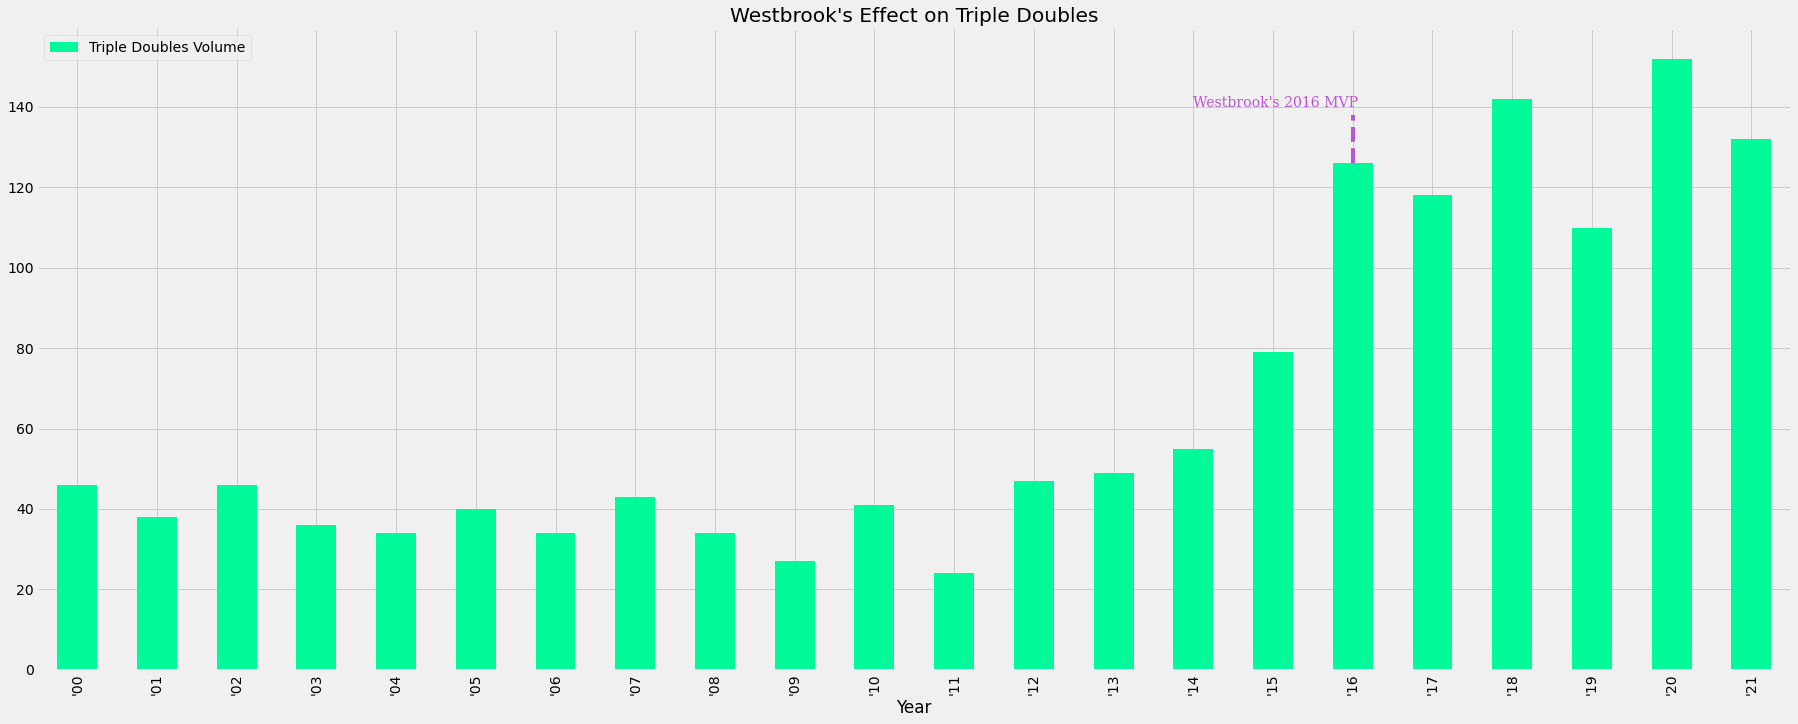

In [65]:
TD_plot(TD_df)

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 20%;"
    src="https://drive.google.com/uc?id=1kGKaYyWeFD-5u5xdo6_vC72W4jSvd4sY">
</img>

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 45%;"
    src="https://static.seattletimes.com/wp-content/uploads/2021/05/urn-publicid-ap-org-027f320d83b32d7935ea46fc8beb8b17Westbrook_Triple_Double_Record_Basketball_60205-2040x1479.jpg">
</img>

## <p style="text-align: center;"> **Main Targets of the Project** 🔍
- <span style="color:lightgreen"> ***Most efficient Field Goal ✔***
- <span style="color:lightgreen"> ***Change in Three-Pointers Style of Game of Modern NBA ✔***
- <span style="color:lightgreen"> ***Change in Triple Double Style of Game of Modern NBA ✔***
- <span style="color:darkturquoise"> ***Rookie of the Year Prediction 〰***
- *Game Simulation*
- *Playoffs Simulation*    
- *Players Clustering*
- *Most Valuable Player Prediction*

---
**<p style="text-align: center;">*Rookie Of The Year (ROTY / ROY) ⛹🏻‍♀️***

---
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 50%;"
    src="https://pbs.twimg.com/media/FWcNJj4UYAAvPkU?format=jpg&name=medium">
</img>

### *. . . What is the Rookie of the Year award?* 💭

It's an **annual award** given from the NBA to the **best first-year** player of the **regular season**

### *. . . What does 'Best Rookie' mean?* 💭

The best rookie is **not** just the player with the **highest stats**

The winner is **selected** by a **panel** of United States and Canadian sportswriters and broadcasters

Each of them votes for *first*, *second* and *third place*, worthing *five points*, *three points* and *one point* respectively

The player(s) with the **highest total score** wins the award

In [66]:
if not skip:
    roty_history = pd.DataFrame([], columns=['PERSON_ID','FIRST_NAME','LAST_NAME','SEASON','OVERALL_PICK'])
    year = 1947
    positions = 60
    while year != 2022:
        yearstr = "'" + str(year)[2:4]
        draft = drafthistory.DraftHistory(season_year_nullable=str(year)).get_data_frames()[0]
        time.sleep(.25)
        for i in range(1, positions+1):
            if i in set(draft[draft['OVERALL_PICK'] == i]['OVERALL_PICK']):
                name = draft[draft['OVERALL_PICK'] == i]['PLAYER_NAME'].iloc[0]
                id = draft[draft['PLAYER_NAME'] == name]['PERSON_ID'].iloc[0]
                awards = playerawards.PlayerAwards(id).get_data_frames()[0]        
                time.sleep(.25)

                if not awards[awards['DESCRIPTION'] == 'NBA Rookie of the Year'].empty:
                    idx = awards.index[awards['DESCRIPTION'] == 'NBA Rookie of the Year']
                    awards['SEASON'] = "'" + awards['SEASON'][idx[0]][2:4]
                    roty = awards[awards['DESCRIPTION'] == 'NBA Rookie of the Year'][['PERSON_ID','FIRST_NAME','LAST_NAME','SEASON']]
                    info = draft[draft['OVERALL_PICK'] == i][['OVERALL_PICK','PERSON_ID']]
                    rotynfo = pd.merge(roty, info)
                    roty_history = pd.concat([roty_history, rotynfo])

        if yearstr not in set(roty_history['SEASON']):
            emptyroty = pd.DataFrame([[None, None, None, 0]], columns=['PERSON_ID','FIRST_NAME','LAST_NAME','OVERALL_PICK'])
            emptynfo = emptyroty.join(pd.DataFrame(["'" + draft['SEASON'][0][2:4]], columns=['SEASON']))
            roty_history = pd.concat([roty_history, emptynfo])

        year += 1

In [67]:
if not skip:
    roty_history.sort_values(by=['SEASON'], inplace=True)
    roty_history.to_csv("df/ROTY", index=False)

In [68]:
if skip:
    roty_history = pd.read_csv('df/ROTY')
    # roty_history

In [69]:
roty_graph = roty_history[['SEASON', 'OVERALL_PICK']]

### <p style="text-align: center;"> Draft Position in which each ROY has been picked

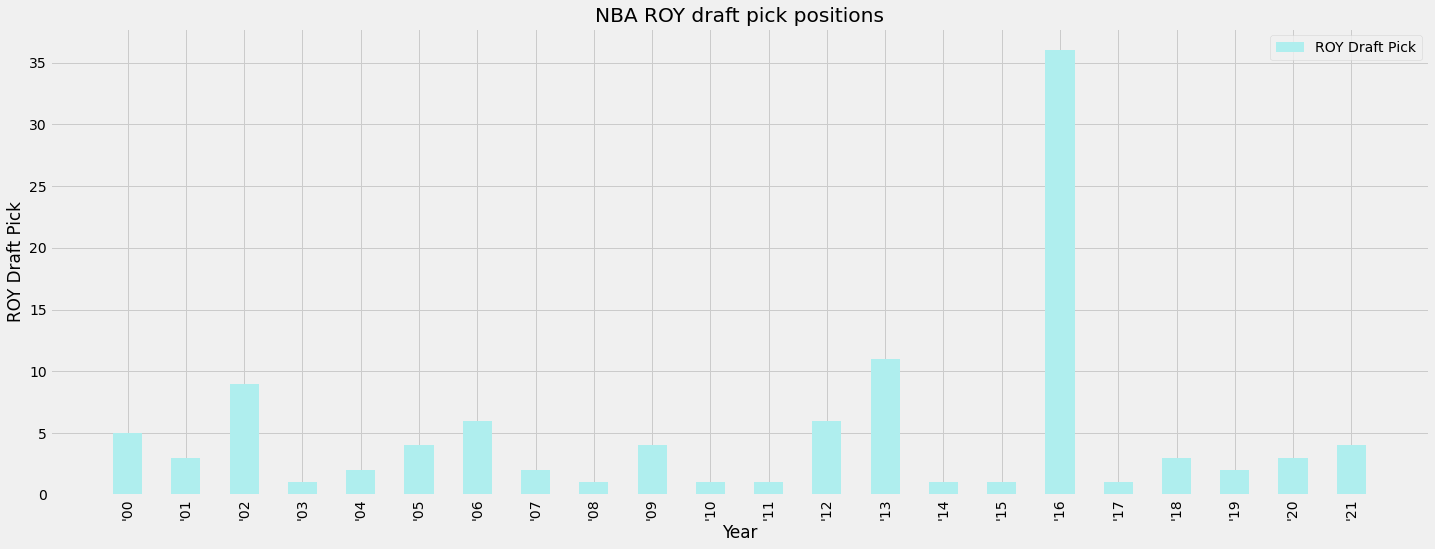

In [70]:
roty_graph.plot.bar(x='SEASON', y='OVERALL_PICK', color='paleturquoise', figsize=(22, 8),
                           title=f"NBA ROY draft pick positions", label='ROY Draft Pick')
plt.xlabel('Year')
plt.ylabel('ROY Draft Pick')
plt.axis('tight')
plt.show()

### <p style="text-align: center;"> Rookie of the Year Prediction

It could happen that voters are **biased**, **affected** by *media* and *people* or even **malicious**

We wanted to check if last season award winner was the player with best stats

So we chose to perform a **Logistic Regression**

In [71]:
if not skip:
    # Getting all-time players stats
    alltime_details =  pd.DataFrame([], columns=['SEASON','ROTY','GROUP_SET', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'PERSON_ID', 'PERSON_NAME', 'COURT_STATUS', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK'])

    year = 2007 # First year with available data
    while year != 2022:
        season_details = pd.DataFrame([], columns=['SEASON','ROTY','GROUP_SET', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'PERSON_ID', 'PERSON_NAME', 'COURT_STATUS', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK'])
        for team in team_dict:
            team_details = leagueplayerondetails.LeaguePlayerOnDetails(season=str(year)+'-'+str(year+1)[2:], team_id=team['id']).get_data_frames()[0]
            time.sleep(.25)
            team_details.rename(columns = {'VS_PLAYER_ID':'PERSON_ID'}, inplace = True)    
            team_details.rename(columns = {'VS_PLAYER_NAME':'PERSON_NAME'}, inplace = True)

            yrs = pd.DataFrame([str(year)[2:]]*len(team_details), columns=['SEASON'])
            rotyzero = pd.DataFrame([0]*len(team_details), columns=['ROTY'])
            team_details = team_details.join(yrs).join(rotyzero)

            if int(roty_history[roty_history['SEASON'] == "'"+str(year)[2:]]['PERSON_ID']) in set(team_details['PERSON_ID']):
                team_details.at[team_details.index[team_details['PERSON_ID'] == int(roty_history[roty_history['SEASON'] == "'"+str(year)[2:]]['PERSON_ID'])].tolist()[0], 'ROTY'] = 1

            season_details = pd.concat([season_details, team_details])

        alltime_details = pd.concat([alltime_details, season_details])
        year += 1

In [72]:
if not skip:
    alltime_detailsils.to_csv("df/AllTimeInfo", index=False)

In [73]:
if skip:
    alltime_details = pd.read_csv('df/AllTimeInfo')
    # alltime_details

In [74]:
# Getting all-time rookie stats
alltime_rookie = pd.DataFrame([], columns=['SEASON','ROTY','GROUP_SET', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'PERSON_ID', 'PERSON_NAME', 'COURT_STATUS', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK'])

year = 2007
while year != 2022:
    draft = drafthistory.DraftHistory(season_year_nullable=year).get_data_frames()[0]
    time.sleep(.25)
    rookies = pd.DataFrame([], columns=['SEASON','ROTY','GROUP_SET', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'PERSON_ID', 'PERSON_NAME', 'COURT_STATUS', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK'])

    for index, row in draft.iterrows():
        rookie_info = alltime_details[alltime_details['PERSON_ID'] == row['PERSON_ID']]      
        rookie_info = rookie_info[rookie_info['SEASON'] == int(str(year)[2:])]

        rookies = pd.concat([rookies, rookie_info])
    
    alltime_rookie = pd.concat([alltime_rookie, rookies])
    year += 1

In [75]:
# alltime_rookie

In [76]:
vars = ['SEASON','ROTY','GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 
        'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
        'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS'
        
       # ,'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 
       # 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 
       # 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK'
        ]

### <p style="text-align: center;"> Data Preparation

Initially the dataframe is created by **data cleaning**

In [77]:
alltime_rookie[['PERSON_NAME', 'SEASON', 'ROTY']].head(7)

,PERSON_NAME,SEASON,ROTY
362,"Durant, Kevin",7,1
2,"Horford, Al",7,0
262,"Conley, Mike",7,0
366,"Green, Jeff",7,0
312,Yi Jianlian,7,0
313,"Brewer, Corey",7,0
181,"Wright, Brandan",7,0


The **stats used** in the regression are chosen

In [78]:
                                                        # Illustrative Code

vars = ['GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 
        'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS']

### <p style="text-align: center;"> Training and Testing Datasets

The dataset is divided into **training** and **testing** sets 

In [79]:
                                                        # Illustrative Code
X = alltime_rookie[vars + ['SEASON']]
y = alltime_rookie[['ROTY', 'SEASON']]
                                            # Splitting the dataset into training and testing sets
X_train = X[X['SEASON'] != 21]
X_test = X[X['SEASON'] == 21]
y_train = y[y['SEASON'] != 21]
y_test = y[y['SEASON'] == 21]

In [80]:
X = alltime_rookie[['SEASON','ROTY'] + vars]
y = alltime_rookie[['SEASON','ROTY']]

# Splitting the dataset into training and testing sets
season = 21
X_train = X[X['SEASON'] != season].drop(['ROTY'], axis=1)
X_test = X[X['SEASON'] == season].drop(['ROTY'], axis=1)
y_train = y[y['SEASON'] != season].drop(['SEASON'], axis=1).astype('int').to_numpy()[:,0]
y_test = y[y['SEASON'] == season].drop(['SEASON'], axis=1).astype('int').to_numpy()[:,0]

Then the training and testing are set is **scaled**

In [81]:
scaler = StandardScaler()
scaler.fit(X_train);

In [82]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

### <p style="text-align: center;"> Model Prediction

Then the model **instantiation** follows

In [ ]:
          # Illustrative Code
    
log_regression = LogisticRegression()


The model is **fitted** using the training data

In [84]:
          # Illustrative Code
    
log_regression.fit(X_train_norm,y_train)


LogisticRegression()

Finally the model is used to **make predictions** on the test data

In [85]:
          # Illustrative Code

y_pred = log_regression.predict(X_test_norm)
y_prob = log_regression.predict_proba(X_test_norm)

In [86]:
# Instantiating the model
log_regression = LogisticRegression()

# Fitting the model using the training data
log_regression.fit(X_train_norm,y_train)

# Using the model to make predictions on test data
y_pred = log_regression.predict(X_test_norm)
y_prob = log_regression.predict_proba(X_test_norm)

In [87]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [88]:
filter = []
for i,x in enumerate(y_pred):
    if x == 1:
        filter.append(i)

In [89]:
draft = drafthistory.DraftHistory(season_year_nullable=2021).get_data_frames()[0]
print("Predicted Winner:")
print(draft.iloc[filter]['PLAYER_NAME'].values) 
print("Real Winner:", roty_history[roty_history['SEASON'] == "'21"][["FIRST_NAME", "LAST_NAME"]].values[0])

Predicted Winner:
['Evan Mobley' 'Scottie Barnes']
Real Winner: ['Scottie' 'Barnes']


### <p style="text-align: center;"> Results

In [90]:
prob = y_prob[:, 1].round(3)
prob

array([0.128, 0.087, 0.539, 0.632, 0.015, 0.045, 0.002, 0.172, 0.045,
       0.033, 0.001, 0.004, 0.035, 0.001, 0.023, 0.005, 0.001, 0.005,
       0.001, 0.001, 0.002, 0.003, 0.002, 0.001, 0.002, 0.001, 0.004,
       0.003, 0.001, 0.002, 0.002, 0.001, 0.004, 0.417, 0.001, 0.001,
       0.077, 0.001, 0.001, 0.001, 0.004, 0.001, 0.007, 0.   , 0.002,
       0.001, 0.001, 0.001, 0.001, 0.   , 0.008, 0.003, 0.001, 0.002,
       0.005])

In [91]:
names = pd.DataFrame(draft['PLAYER_NAME'].to_list(), columns=["Player"])
prob_df = pd.DataFrame(prob, columns=["Probability"])
Player_Prob = names.join(prob_df)

In [92]:
Player_Prob.head(10)

,Player,Probability
0,Cade Cunningham,0.128
1,Jalen Green,0.087
2,Evan Mobley,0.539
3,Scottie Barnes,0.632
4,Jalen Suggs,0.015
5,Josh Giddey,0.045
6,Jonathan Kuminga,0.002
7,Franz Wagner,0.172
8,Davion Mitchell,0.045
9,Ziaire Williams,0.033


<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 35%;"
    src="http://toplegalsportsbooks.com/wp-content/uploads/2019/02/milestone_ROY.jpg">
</img>

The player with highest probability is selected

In [93]:
i = prob.argmax()
print(f"Predicted Winner: {draft.iloc[i]['PLAYER_NAME']} 🏆")
print("Real Winner:", roty_history[roty_history['SEASON'] == "'21"][["FIRST_NAME", "LAST_NAME"]].values[0])

Predicted Winner: Scottie Barnes 🏆
Real Winner: ['Scottie' 'Barnes']


In [94]:
prob_max = [1 if x == prob.max() else 0 for x in prob]

In [95]:
print(cnf_matrix := metrics.confusion_matrix(y_test, y_pred))
print(f"True Winners: {cnf_matrix[1][1]}")
print(f"True Losers: {cnf_matrix[0][0]}")
print(f"False Winner: {cnf_matrix[0][1]}")
print(f"False Losers: {cnf_matrix[1][0]}")

[[53  1]
 [ 0  1]]
True Winners: 1
True Losers: 53
False Winner: 1
False Losers: 0


In [96]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy: 98.18181818181819 %


### <p style="text-align: center;"> Confusion Matrix

In [97]:
print(cnf_matrix := metrics.confusion_matrix(y_test, prob_max))
print(f"True Winners: {cnf_matrix[1][1]}")
print(f"True Losers: {cnf_matrix[0][0]}")
print(f"False Winner: {cnf_matrix[0][1]}")
print(f"False Losers: {cnf_matrix[1][0]}")


[[54  0]
 [ 0  1]]
True Winners: 1
True Losers: 54
False Winner: 0
False Losers: 0


In [98]:
# Prediction Accuracy

print("Accuracy:", \
      metrics.accuracy_score(y_test, prob_max) \
      *100, "%")


Accuracy: 100.0 %


<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 30%;"
    src="https://media.giphy.com/media/054ZPjUUVPHPwrzpHJ/giphy.gif?cid=ecf05e47fd38bt37vgep67ktxtluir1t694e4xnynupb97ea&rid=giphy.gif&ct=g">
</img>

## <p style="text-align: center;"> **Main Targets of the Project** 🔍
- <span style="color:lightgreen"> ***Most efficient Field Goal ✔***
- <span style="color:lightgreen"> ***Change in Three-Pointers Style of Game of Modern NBA ✔***
- <span style="color:lightgreen"> ***Change in Triple Double Style of Game of Modern NBA ✔***
- <span style="color:lightgreen"> ***Rookie of the Year Prediction ✔***
- <span style="color:darkturquoise"> ***Game Simulation 〰***
- *Playoffs Simulation*    
- *Players Clustering*
- *Most Valuable Player Prediction*

---
**<p style="text-align: center;">*Game Simulation***

---
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 50%;"
    src="https://basketballforever.nyc3.cdn.digitaloceanspaces.com/wp-content/uploads/2020/05/14000954/Spalding.jpg">
</img>

In [99]:
def simulation():
    print("To leave insert 'Q' at any time!")
    abbr_df = pd.DataFrame([team['abbreviation'] for team in team_dict], columns=['Team'])
    show = ""
    flag = True
    while show != "Y" and show != "N":
        show = input("Do you want to see the teams before choosing? (Y/N) ").upper()
        if show == 'Q':
            return None, None, None
        if show == "Y":
            print(abbr_df)
    
    abbr1 = ""
    while abbr1 not in abbr_df.values[:,0]:
        abbr1 = input("Insert First Team (Abbreviation) - ").upper()
        if abbr1 == 'Q':
            return None, None, None
        if abbr1 not in abbr_df.values[:,0]:
            print("Insert a valid team (Abbreviation)!")

    team1 = teams.find_team_by_abbreviation(abbr1)
    print(f"First Team selected: {team1['full_name']}")
    abbr2 = ""
    while abbr2 not in abbr_df.values[:,0]:
        abbr2 = input("Insert Second Team (Abbreviation) - ").upper()
        if abbr2 == 'Q':
            return None, None, None
        if abbr1 not in abbr_df.values[:,0]:
                print("Insert a valid team (Abbreviation)!")
                
    team2 = teams.find_team_by_abbreviation(abbr2)
    print(f"Second Team selected: {team2['full_name']}")
    year = 0
    while not 1946 < year < 2022:
        year = input("Insert Season (yyyy) - ")
        if year == 'Q':
            return None, None, None
        year = int(year)
        if not 1946 < year < 2022:
            print("Insert a valid year!")
        else:
            print(f"Season selected: {year}")
    return team1, team2, year

In [225]:
                                        #    ⚠ Code to Run ⚠
team1, team2, year = simulation()

To leave insert 'Q' at any time!
Do you want to see the teams before choosing? (Y/N) n
Insert First Team (Abbreviation) - gsw
First Team selected: Golden State Warriors
Insert Second Team (Abbreviation) - bos
Second Team selected: Boston Celtics
Insert Season (yyyy) - 2021
Season selected: 2021


In [101]:
'''
for team in team_dict:
    team_log = teamgamelog.TeamGameLog(team_id=team['id'], season=year, season_type_all_star='Regular Season').get_data_frames()[0]
    time.sleep(.25)
    team_log.to_csv(f"df/Season2021/{team['abbreviation']}")
''';

In [102]:
def game_log(first_team, second_team, year):
    team1 = teams.find_team_by_abbreviation(first_team)
    team2 = teams.find_team_by_abbreviation(second_team)
    abbr1 = first_team
    abbr2 = second_team
    
    team1pts,team1ptsallowed = [],[]
    team2pts,team2ptsallowed = [],[]

    for team in team_dict:
        abbr0 = team['abbreviation']
        
        if year == 2021:
            team_log0 = pd.read_csv(f"df/Season2021/{abbr0}")
            team_log1 = pd.read_csv(f"df/Season2021/{abbr1}")
            team_log2 = pd.read_csv(f"df/Season2021/{abbr2}")
        else:
            team_log0 = teamgamelog.TeamGameLog(team_id=team['id'], season=year, season_type_all_star='Regular Season').get_data_frames()[0]
            time.sleep(.25)
            team_log1 = teamgamelog.TeamGameLog(team_id=team1['id'], season=year, season_type_all_star='Regular Season').get_data_frames()[0]
            time.sleep(.25)
            team_log2 = teamgamelog.TeamGameLog(team_id=team2['id'], season=year, season_type_all_star='Regular Season').get_data_frames()[0]
            time.sleep(.25)
        
        # Team 1
        awaygames0 = team_log0[team_log0['MATCHUP'] == f'{abbr0} @ {abbr1}']
        homegames0 = team_log0[team_log0['MATCHUP'] == f'{abbr0} vs. {abbr1}']
        games_log0 = pd.concat([awaygames0, homegames0])
        team1ptsallowed += games_log0['PTS'].to_list()
        

        awaygames1 = team_log1[team_log1['MATCHUP'] == f'{abbr1} @ {abbr0}']
        homegames1 = team_log1[team_log1['MATCHUP'] == f'{abbr1} vs. {abbr0}']
        games_log1 = pd.concat([awaygames1, homegames1])
        team1pts += games_log1['PTS'].to_list()

        # Team 2
        awaygames2 = team_log0[team_log0['MATCHUP'] == f'{abbr0} @ {abbr2}']
        homegames2 = team_log0[team_log0['MATCHUP'] == f'{abbr0} vs. {abbr2}']
        games_log2 = pd.concat([awaygames2, homegames2])
        team2ptsallowed += games_log2['PTS'].to_list()

        awaygames3 = team_log2[team_log2['MATCHUP'] == f'{abbr2} @ {abbr0}']
        homegames3 = team_log2[team_log2['MATCHUP'] == f'{abbr2} vs. {abbr0}']
        games_log3 = pd.concat([awaygames3, homegames3])
        team2pts += games_log3['PTS'].to_list()

    # Direct Matches
    '''
    awaydirgames1 = team_log1[team_log1['MATCHUP'] == f'{abbr1} @ {abbr2}']
    homedirgames1 = team_log1[team_log1['MATCHUP'] == f'{abbr1} vs. {abbr2}']
    dirgames_log1 = pd.concat([awaydirgames1, homedirgames1])
    team1pts += dirgames_log1['PTS'].to_list()
    team2ptsallowed += dirgames_log1['PTS'].to_list()

    awaydirgames2 = team_log2[team_log2['MATCHUP'] == f'{abbr2} @ {abbr1}']
    homedirgames2 = team_log2[team_log2['MATCHUP'] == f'{abbr2} vs. {abbr1}']
    dirgames_log2 = pd.concat([awaydirgames2, homedirgames2])
    team2pts += dirgames_log2['PTS'].to_list()
    team1ptsallowed += dirgames_log2['PTS'].to_list()
    '''

    Team1pts = pd.DataFrame(team1pts, columns=['Points'])
    Team2pts = pd.DataFrame(team2pts, columns=['Points'])
    Team1ptsallowed = pd.DataFrame(team1ptsallowed, columns=['Points'])
    Team2ptsallowed = pd.DataFrame(team2ptsallowed, columns=['Points'])
        
    return  team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed

### <p style="text-align: center;"> Data Collection

Data about **points scored** and **points allowed** are collected by looking at the regular season and by recording the stats of every match both team played

In [226]:
                                        #    ⚠ Code to Run ⚠
team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed \
= game_log(team1['abbreviation'], team2['abbreviation'], year)
Team1pts.head(7)

,Points
0,110
1,127
2,111
3,88
4,117
5,110
6,102


In [104]:
if not skip:
    team1, team2, year = simulation()

# team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log()

In [105]:
def hist_pts_scored(Team1pts, Team2pts):
    fig, axes = plt.subplots(1, 2, figsize=(20,8))
    axes[0].set_xlabel("Points")
    axes[0].set_ylabel("Frequency")
    axes[1].set_xlabel("Points")
    axes[1].set_ylabel("Frequency")

    Team1pts.hist(bins=10, color="orchid", ax=axes[0])
    axes[0].title.set_text(f"{team1['full_name']}")
    Team2pts.hist(bins=10, color="aquamarine", ax=axes[1])
    axes[1].title.set_text(f"{team2['full_name']}")

    fig.suptitle(f"Team Points Made Frequency | {year}-{str(year+1)[2:]} Season")
    plt.show()

### <p style="text-align: center;"> Points Made

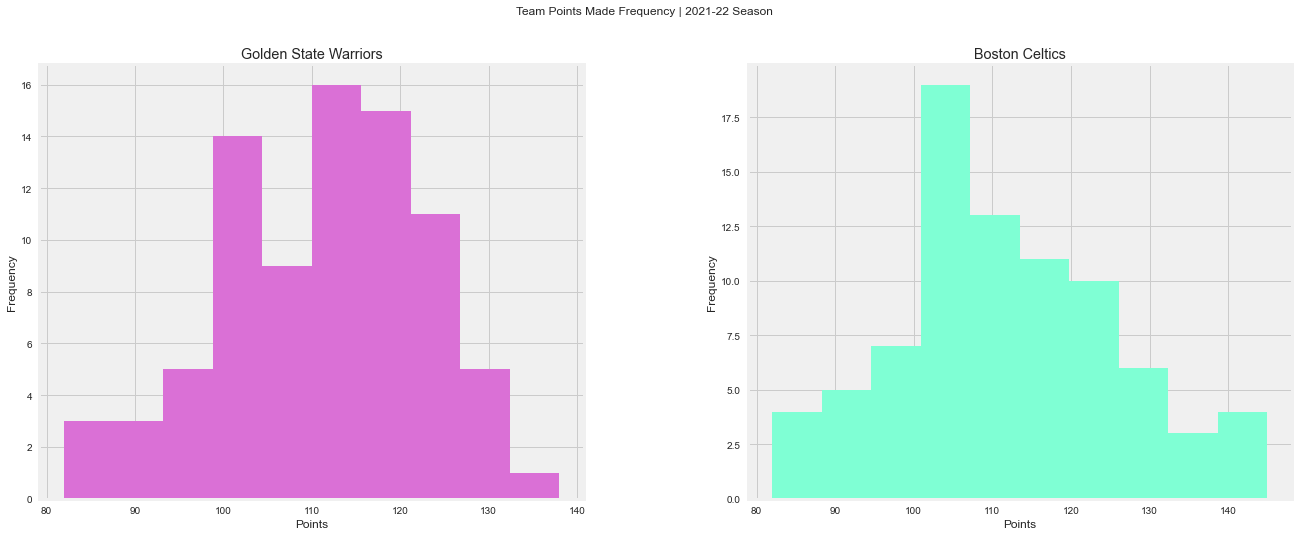

In [227]:
                                        #    ⚠ Code to Run ⚠
hist_pts_scored(Team1pts, Team2pts)

In [107]:
def hist_pts_allowed(Team1ptsallowed, Team2ptsallowed):
    fig, axes = plt.subplots(1, 2, figsize=(20,8))
    axes[0].set_xlabel("Points")
    axes[0].set_ylabel("Frequency")
    axes[1].set_xlabel("Points")
    axes[1].set_ylabel("Frequency")

    Team1ptsallowed.hist(bins=10, color="turquoise", ax=axes[0])
    axes[0].title.set_text(f"{team1['full_name']}")
    Team2ptsallowed.hist(bins=10, color="springgreen", ax=axes[1])
    axes[1].title.set_text(f"{team2['full_name']}")

    fig.suptitle(f"Team Points Allowed Frequency | {year}-{str(year+1)[2:]} Season")
    plt.show()

### <p style="text-align: center;"> Points Allowed

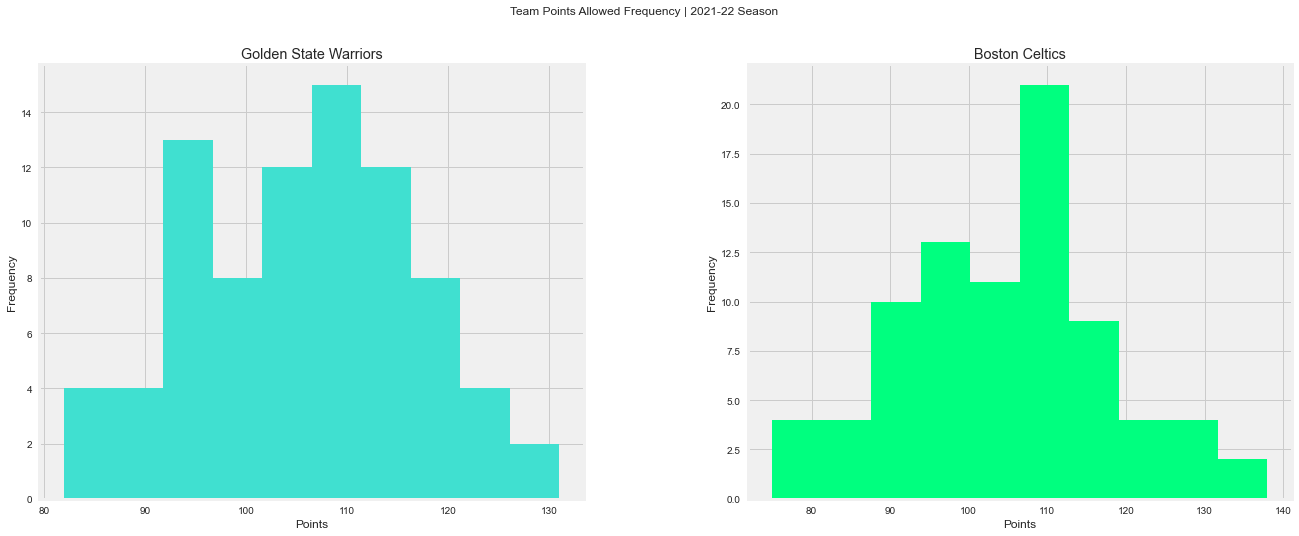

In [228]:
                                        #    ⚠ Code to Run ⚠
hist_pts_allowed(Team1ptsallowed, Team2ptsallowed)

### <p style="text-align: center;"> Bootstrap

Data of a season is used to simulate a **single game**

**Non-Parametric** and **Parametric Bootstrap** are fed with this data

The graphs in previous slides were the **distributions** from which Bootstrap will **sample** from

To **calculate** a team(t1) **score** we sum a sample from the *points made distribution*(t1) and a sample from the *points allowed distribution* of the opposite team(t2)

In this way the *offensive power* of the team is **combined** with the *defensive caliber* of the opposite team

### <p style="text-align: center;"> ***Non-Parametric Bootstrap***

In [109]:
B = 10000
win, tie = 0, 0

for b in range(B):
    team1scores = np.random.choice(team1pts, len(team1pts)) + np.random.choice(team2ptsallowed, len(team1pts))
    team2scores = np.random.choice(team2pts, len(team2pts)) + np.random.choice(team1ptsallowed, len(team2pts))
    team1score = round(np.mean(team1scores))
    team2score = round(np.mean(team2scores))
    if team1score > team2score:
        win += 1
    elif team1score < team2score:
        continue
    else:
        tie += 1

print(f"{team1['full_name']} win rate against {team2['full_name']}: {round(win/B*100, 2)} %")
print(f"{team1['full_name']} lose rate against {team2['full_name']}: {round((B-win-tie)/B*100, 2)} %")
print(f"{team1['full_name']} tie rate against {team2['full_name']}: {round(tie/B*100, 2)} %")


Golden State Warriors win rate against Boston Celtics: 20.92 %
Golden State Warriors lose rate against Boston Celtics: 67.05 %
Golden State Warriors tie rate against Boston Celtics: 12.03 %


### <p style="text-align: center;"> ***Parametric Bootstrap***

In [110]:
# Team 1
print(f"{team1['full_name']} points scored mean is", team1ptsmean := round(Team1pts.mean()[0], 2))
print(f"{team1['full_name']} points scored standard deviation is", team1ptssd := round(Team1pts.std()[0], 2), "\n", "- "*33)

print(f"{team1['full_name']} points allowed mean is", team1ptsallowedmean := round(Team1ptsallowed.mean()[0], 2))
print(f"{team1['full_name']} points allowed standard deviation is", team1ptsallowedsd := round(Team1ptsallowed.std()[0], 2), "\n", "- "*33)

# Team2
print(f"{team2['full_name']} points scored mean is", team2ptsmean := round(Team2pts.mean()[0], 2))
print(f"{team2['full_name']} points scored standard deviation is", team2ptssd := round(Team2pts.std()[0], 2), "\n", "- "*33)

print(f"{team2['full_name']} points allowed mean is", team2ptsallowedmean := round(Team2ptsallowed.mean()[0], 2))
print(f"{team2['full_name']} points allowed standard deviation is", team2ptsallowedsd := round(Team2ptsallowed.std()[0], 2))

Golden State Warriors points scored mean is 111.0
Golden State Warriors points scored standard deviation is 11.78 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Golden State Warriors points allowed mean is 105.46
Golden State Warriors points allowed standard deviation is 11.13 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Boston Celtics points scored mean is 111.76
Boston Celtics points scored standard deviation is 14.15 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Boston Celtics points allowed mean is 104.48
Boston Celtics points allowed standard deviation is 13.39


In [111]:
def game_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed):

    team1ptsmean = round(Team1pts.mean()[0], 2)
    team1ptssd = round(Team1pts.std()[0], 2)
    team1ptsallowedmean = round(Team1ptsallowed.mean()[0], 2)
    team1ptsallowedsd = round(Team1ptsallowed.std()[0], 2)
    team2ptsmean = round(Team2pts.mean()[0], 2)
    team2ptssd = round(Team2pts.std()[0], 2)
    team2ptsallowedmean = round(Team2ptsallowed.mean()[0], 2)
    team2ptsallowedsd = round(Team2ptsallowed.std()[0], 2)
    
    B = 10000
    win = 0
    tie = 0

    for b in range(B):
        team1score = round(np.random.normal(loc=team1ptsmean, scale=team1ptssd) + np.random.normal(loc=team2ptsallowedmean, scale=team2ptsallowedsd))
        team2score = round(np.random.normal(loc=team2ptsmean, scale=team2ptssd) + np.random.normal(loc=team1ptsallowedmean, scale=team1ptsallowedsd))
        if team1score > team2score:
            win += 1
            tie += 0
        elif team1score < team2score:
            win += 0
            tie += 0
        else:
            win += 0
            tie += 1

    win_rate = round(win/B, 2) + round(tie/B, 2) / 2 # Winning rate + half Tying rate
    
    # print(f"{team1['full_name']} win rate against {team2['full_name']}: {round(win_rate * 100, 2)} %")
    
    # print(f"{team1['full_name']} pure win rate against {team2['full_name']}: {round(win/B*100, 2)} %")
    # print(f"{team1['full_name']} lose rate against {team2['full_name']}: {round((B-win-tie)/B*100, 2)} %")
    # print(f"{team1['full_name']} tie rate against {team2['full_name']}: {round(tie/B*100, 2)} %")
    
    return win_rate 
    

Now the scores are sampled by a Gaussian whose parameters are those on the left ↙

In [112]:
                    # Illustrative Code
if not skip:
    team1score = \
    normal(loc=ptsmean1, scale=ptssd1) + \
    normal(loc=ptsallwdmean2, scale=ptsallowedsd2)

In [113]:
win_rate = game_simulation(Team1pts,Team1ptsallowed, \
                           Team2pts,Team2ptsallowed)
print(f"{team1['full_name']} win rate against {team2['full_name']}: {round(win_rate * 100, 2)} %")

Golden State Warriors win rate against Boston Celtics: 48.0 %


Once we can simulate a game we can proceed simulating the Playoffs

## <p style="text-align: center;"> **Main Targets of the Project** 🔍
- <span style="color:lightgreen"> ***Most efficient Field Goal ✔***
- <span style="color:lightgreen"> ***Change in Three-Pointers Style of Game of Modern NBA ✔***
- <span style="color:lightgreen"> ***Change in Triple Double Style of Game of Modern NBA ✔***
- <span style="color:lightgreen"> ***Rookie of the Year Prediction ✔***
- <span style="color:lightgreen"> ***Game Simulation ✔***
- <span style="color:darkturquoise"> ***Playoffs Simulation 〰***
- *Players Clustering*
- *Most Valuable Player Prediction*

---
**<p style="text-align: center;">*Play-offs Simulation***

---
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 50%;"
    src="Imgs/Arena.png" >
</img>

### *. . . What are the Playoffs?* 💭

The NBA Playoffs is the **postseason** NBA **tournament** to determine the **league champion**

The **top eight** regular season teams of the *Conferences* (*Eastern* and *Western*) advance to the playoffs

The *first* team of a conferernce will face the *eighth*, the *second* will face the *seventh*, the *third* the *sixth* and so on... 

The **winners** of the two conferences face each other in the **Finals**

To win the title each team needs to win four series: *First Round* (*Conference Quarter Finals*), *Conference Semifinals*, *Conference Finals* and *NBA Finals*

Each round is ***best-of-seven***: the first team to reach four direct games wins passes the round 

In [168]:
# Team rankings
def season(year):
    east_conference = []
    west_conference = []

    if year == 2021:
        East_conference = pd.read_csv("df/EastConference2021")
        West_conference = pd.read_csv("df/WestConference2021")

    else:
        for team in team_dict:
            team_rank = teaminfocommon.TeamInfoCommon(team_id=team['id'], season_nullable=year).get_data_frames()[0]
            time.sleep(.25)
            rank = team_rank['CONF_RANK'][0]
            if rank <= 8:
                conference = team_rank['TEAM_CONFERENCE'][0]
                if conference == "East":
                    east_conference.append([rank, team['abbreviation']])
                else:
                    west_conference.append([rank, team['abbreviation']])

        West_conference = pd.DataFrame(west_conference, columns=['Rank','Team'])
        East_conference = pd.DataFrame(east_conference, columns=['Rank','Team'])
    return East_conference,West_conference

In [115]:
def series_simulation(Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed):
    t1 = 0
    t2 = 0
    win_rate = game_simulation(Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed)
    lose_rate = round(1 - win_rate)
    # print(win_rate)
    for game in range(7):
        if t1 == 4 or t2 == 4:
            break
        win = random.choices([0, 1], weights=[lose_rate, win_rate], k=1)[0]
        if win:
            t1 += 1
            # print(f"Game {game+1} won")
        else:
            t2 += 1
            # print(f"Game {game+1} lost")
    if t1 > t2:
        # print(f"{t1} - {t2}")
        return 1
    elif t2 > t1:
        # print(f"{t1} - {t2}")
        return 0

In [171]:
'''MIA = io.imread("https://drive.google.com/uc?id=1ZNPGmb6S3efC0eN30zScYoGEmf6nbQ2Q")[:, :, ::-1]
ATL = io.imread("https://drive.google.com/uc?id=1a6QCkhCu-QUJ74pFR-8bbMqlFOj1zRY_")[:, :, ::-1]
PHI = io.imread("https://drive.google.com/uc?id=1-V8iR5ctywsVrHoiLGX16RXD0u_i9xMB")[:, :, ::-1]
TOR = io.imread("https://drive.google.com/uc?id=1JJ_vACPX8sU7QUfasVKJVGb5hoXxH1wu")[:, :, ::-1]
MIL = io.imread("https://drive.google.com/uc?id=14NmPAo_7ebziRdvSaLhN7XU_RLuR_f62")[:, :, ::-1]
CHI = io.imread("https://drive.google.com/uc?id=1gb13wGtGyKDBAW3u9IJwjsFtMNv5kbfH")[:, :, ::-1]
BOS = io.imread("https://drive.google.com/uc?id=1XsrU5eAwaupHeduUAiSrnBfkxJXWei-h")[:, :, ::-1]
BKN = io.imread("https://drive.google.com/uc?id=1BNmK8CE3SLxoBuc497euaM5vxa0_LHuD")[:, :, ::-1]
PHX = io.imread("https://drive.google.com/uc?id=1SwLeExrR_xT34lMhyYJ1IASZ15oa56t9")[:, :, ::-1]
NOP = io.imread("https://drive.google.com/uc?id=1U3AdUaUOMYZAJa4mnVqeswwiNXno27oT")[:, :, ::-1]
DAL = io.imread("https://drive.google.com/uc?id=11g0jh7vqODLH9KrnsB1wu-yhAO9q2OX0")[:, :, ::-1]
UTA = io.imread("https://drive.google.com/uc?id=1V2bmV4GULmpFcKld7iWbegMAW6jm-Tm3")[:, :, ::-1]
GSW = io.imread("https://drive.google.com/uc?id=1F4l7ixktz2SChQlfvpGHSG1HYzd9NmCy")[:, :, ::-1]
DEN = io.imread("https://drive.google.com/uc?id=1fwoE2Cl4qwRyhVAhSLfEl3i8UnA3n-6K")[:, :, ::-1]
MEM = io.imread("https://drive.google.com/uc?id=1e4qFREBRDUNHuSi8Mu1K-WZa059l1CRB")[:, :, ::-1]
MIN = io.imread("https://drive.google.com/uc?id=1khu-mMYeXezVG4KWkBvRg-ucMbYtqVlT")[:, :, ::-1]'''

In [172]:
logos = {'mia':MIA, 'atl':ATL, 'phi':PHI, 'tor':TOR, 'mil':MIL, 'chi':CHI, 'bos':BOS, 'bkn':BKN, \
         'phx':PHX, 'nop':NOP, 'dal':DAL, 'uta':UTA, 'gsw':GSW, 'den':DEN, 'mem':MEM, 'min':MIN}

In [177]:
def playoffs():
    year = 2021
    while not 2004 <= year <= 2021:
        year = int(input("Insert Season"))
        if not 2004 <= year <= 2021:
            print("Insert a valid Season")

    east_conference,west_conference = season(year)
    playoffs = cv2.imread("Imgs/Playoffs.png")

    # Round 1 Eastern Conference
    first = east_conference[east_conference['Rank'] == 1]['Team'].iloc[[0][0]]
    second = east_conference[east_conference['Rank'] == 2]['Team'].iloc[[0][0]]
    third = east_conference[east_conference['Rank'] == 3]['Team'].iloc[[0][0]]
    fourth = east_conference[east_conference['Rank'] == 4]['Team'].iloc[[0][0]]
    fifth = east_conference[east_conference['Rank'] == 5]['Team'].iloc[[0][0]]
    sixth = east_conference[east_conference['Rank'] == 6]['Team'].iloc[[0][0]]
    seventh = east_conference[east_conference['Rank'] == 7]['Team'].iloc[[0][0]]
    eighth = east_conference[east_conference['Rank'] == 8]['Team'].iloc[[0][0]]

    logoe1 = cv2.imread(f"Imgs/{first}.png")
    playoffs[60:110, 720:770] = logoe1

    logoe8 = cv2.imread(f"Imgs/{eighth}.png")
    playoffs[120:170, 720:770] = logoe8 

    logoe4 = cv2.imread(f"Imgs/{fourth}.png")
    playoffs[180:230, 720:770] = logoe4

    logoe5 = cv2.imread(f"Imgs/{fifth}.png")
    playoffs[240:290, 720:770] = logoe5

    logoe3 = cv2.imread(f"Imgs/{third}.png")
    playoffs[310:360, 720:770] = logoe3

    logoe6 = cv2.imread(f"Imgs/{sixth}.png")
    playoffs[370:420, 720:770] = logoe6

    logoe2 = cv2.imread(f"Imgs/{second}.png")
    playoffs[430:480, 720:770] = logoe2

    logoe7 = cv2.imread(f"Imgs/{seventh}.png")
    playoffs[490:540, 720:770] = logoe7

    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(first, eighth, year)
    r1e1 = first if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else eighth
    print(first, " - ", eighth, " wins ", r1e1)
    logor1e1 = cv2.imread(f"Imgs/{r1e1}.png")
    playoffs[90:140, 610:660] = logor1e1

    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(fourth, fifth, year)
    r1e2 = fourth if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else fifth
    print(fourth, " - ", fifth, " wins ", r1e2)
    logor1e2 = cv2.imread(f"Imgs/{r1e2}.png")
    playoffs[210:260, 610:660] = logor1e2

    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(third, sixth, year)
    r1e3 = third if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else sixth
    print(third, " - ", sixth, " wins ", r1e3)
    logor1e3 = cv2.imread(f"Imgs/{r1e3}.png")
    playoffs[340:390, 610:660] = logor1e3

    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(second, seventh, year)
    r1e4 = second if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else seventh
    print(second, " - ", seventh, " wins ", r1e4)
    logor1e4 = cv2.imread(f"Imgs/{r1e4}.png")
    playoffs[470:520, 610:660] = logor1e4

    # Round 1 Western Conference
    first = west_conference[west_conference['Rank'] == 1]['Team'].iloc[[0][0]]
    second = west_conference[west_conference['Rank'] == 2]['Team'].iloc[[0][0]]
    third = west_conference[west_conference['Rank'] == 3]['Team'].iloc[[0][0]]
    fourth = west_conference[west_conference['Rank'] == 4]['Team'].iloc[[0][0]]
    fifth = west_conference[west_conference['Rank'] == 5]['Team'].iloc[[0][0]]
    sixth = west_conference[west_conference['Rank'] == 6]['Team'].iloc[[0][0]]
    seventh = west_conference[west_conference['Rank'] == 7]['Team'].iloc[[0][0]]
    eighth = west_conference[west_conference['Rank'] == 8]['Team'].iloc[[0][0]]

    logow1 = cv2.imread(f"Imgs/{first}.png")
    playoffs[60:110, 60:110] = logow1

    logow8 = cv2.imread(f"Imgs/{eighth}.png")
    playoffs[120:170, 60:110] = logow8

    logow4 = cv2.imread(f"Imgs/{fourth}.png")
    playoffs[180:230, 60:110] = logow4

    logow5 = cv2.imread(f"Imgs/{fifth}.png")
    playoffs[240:290, 60:110] = logow5

    logow3 = cv2.imread(f"Imgs/{third}.png")
    playoffs[310:360, 60:110] = logow3

    logow6 = cv2.imread(f"Imgs/{sixth}.png")
    playoffs[370:420, 60:110] = logow6

    logo2 = cv2.imread(f"Imgs/{second}.png")
    playoffs[440:490, 60:110] = logo2

    logow7 = cv2.imread(f"Imgs/{seventh}.png")
    playoffs[500:550, 60:110] = logow7

    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(first, eighth, year)
    r1w1 = first if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else eighth
    print(first, " - ", eighth, " wins ", r1w1)
    logor1w1 = cv2.imread(f"Imgs/{r1w1}.png")
    playoffs[90:140, 190:240] = logor1w1

    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(fourth, fifth, year)
    r1w2 = fourth if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else fifth
    print(fourth, " - ", fifth, " wins ", r1w2)
    logor1w2 = cv2.imread(f"Imgs/{r1w2}.png")
    playoffs[210:260, 190:240] = logor1w2

    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(third, sixth, year)
    r1w3 = third if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else sixth
    print(third, " - ", sixth, " wins ", r1w3)
    logor1w3 = cv2.imread(f"Imgs/{r1w3}.png")
    playoffs[340:390, 190:240] = logor1w3

    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(second, seventh, year)
    r1w4 = second if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else seventh
    print(second, " - ", seventh, " wins ", r1w4)
    logor1w4 = cv2.imread(f"Imgs/{r1w4}.png")
    playoffs[460:510, 190:240] = logor1w4

    # Eastern Conference Semifinals
    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(r1e1, r1e2, year)
    r2e1 = r1e1 if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else r1e2
    print(r1e1, " - ", r1e2, " wins ", r2e1)
    logor2e1 = cv2.imread(f"Imgs/{r2e1}.png")
    playoffs[150:200, 500:550] = logor2e1

    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(r1e3, r1e4, year)
    r2e2 = r1e3 if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else r1e4
    print(r1e3, " - ", r1e4, " wins ", r2e2)
    logor2e2 = cv2.imread(f"Imgs/{r2e2}.png")
    playoffs[400:450, 500:550] = logor2e2

    # Western Conference Semifinals
    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(r1w1, r1w2, year)
    r2w1 = r1w1 if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else r1w2
    print(r1w1, " - ", r1w2, " wins ", r2w1)
    logor2w1 = cv2.imread(f"Imgs/{r2w1}.png")
    playoffs[150:200, 300:350] = logor2w1

    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(r1w3, r1w4, year)
    r2w2 = r1w3 if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else r1w4
    print(r1w3, " - ", r1w4, " wins ", r2w2)
    logor2w2 = cv2.imread(f"Imgs/{r2w2}.png")
    playoffs[400:450, 300:350] = logor2w2

    # Eastern Conference Finals
    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(r2e1, r2e2, year)
    r3e = r2e1 if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else r2e2
    print(r2e1, " - ", r2e2, " wins ", r3e)
    logor3e = cv2.imread(f"Imgs/{r3e}.png")
    playoffs[277:327, 510:560] = logor3e

    # Western Conference Finals
    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(r2w1, r2w2, year)
    r3w = r2w1 if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else r2w2
    print(r2w1, " - ", r2w2, " wins ", r3w)
    logor3w = cv2.imread(f"Imgs/{r3w}.png")
    playoffs[277:327, 280:330] = logor3w

    # Finals
    team1pts,team1ptsallowed,team2pts,team2ptsallowed,Team1pts,Team2pts,Team1ptsallowed,Team2ptsallowed = game_log(r3w, r3e, year)
    champs = r2w1 if series_simulation(Team1pts,Team1ptsallowed,Team2pts,Team2ptsallowed) else r2w2
    print(r3w, " - ", r3e, " wins ", champs)
    logochamps = cv2.imread(f"Imgs/{champs}.png")
    playoffs[277:327, 395:445] = logochamps

    playoffs = cv2.cvtColor(playoffs, cv2.COLOR_BGR2RGB)
    return playoffs

### <p style="text-align: center;"> Simulation with Parametric Bootstrap

In [180]:
playoffs_bracket = playoffs()

MIA  -  ATL  wins  MIA
PHI  -  TOR  wins  PHI
MIL  -  CHI  wins  MIL
BOS  -  BKN  wins  BOS
PHX  -  NOP  wins  PHX
DAL  -  UTA  wins  UTA
GSW  -  DEN  wins  GSW
MEM  -  MIN  wins  MEM
MIA  -  PHI  wins  MIA
MIL  -  BOS  wins  BOS
PHX  -  UTA  wins  PHX
GSW  -  MEM  wins  GSW
MIA  -  BOS  wins  BOS
PHX  -  GSW  wins  PHX
PHX  -  BOS  wins  PHX


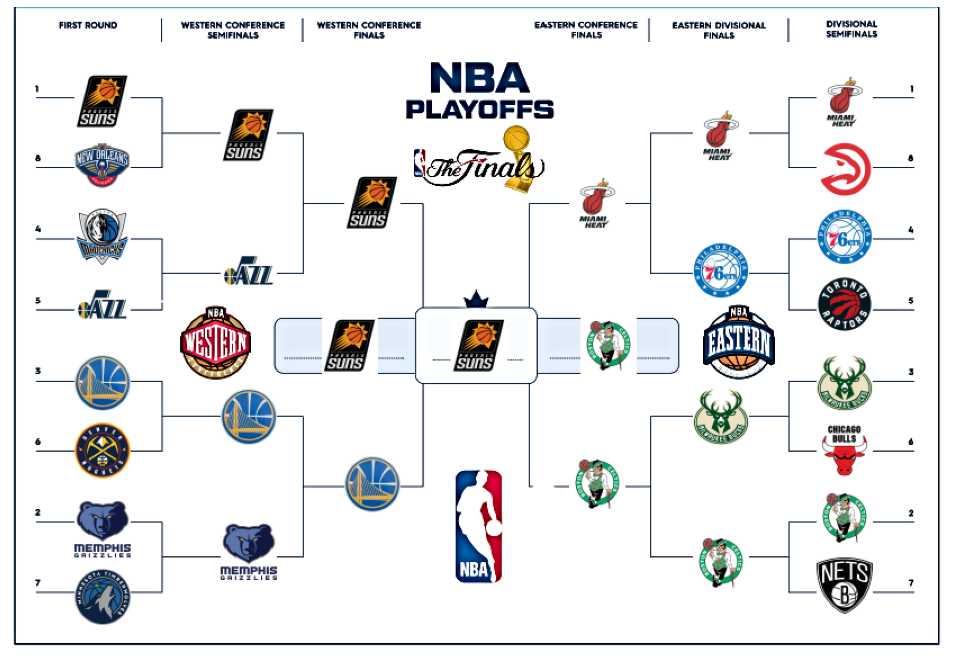

In [181]:
plt.figure(figsize=(15,14))
plt.axis('off')
plt.imshow(playoffs_bracket)
plt.show()

In [182]:
#playoffs2021 = io.imread("https://drive.google.com/uc?id=1KGBNvKylJwilDQyKE5srciuPR26RdKyz")[:, :, ::-1]
playoffs2021 = cv2.imread("Imgs/Playoffs.png")

In [183]:

playoffs2021[60:110, 720:770] = MIA

playoffs2021[120:170, 720:770] = ATL   

playoffs2021[180:230, 720:770] = PHI

playoffs2021[240:290, 720:770] = TOR

playoffs2021[310:360, 720:770] = MIL

playoffs2021[370:420, 720:770] = CHI

playoffs2021[430:480, 720:770] = BOS

playoffs2021[490:540, 720:770] = BKN

playoffs2021[60:110, 60:110] = PHX

playoffs2021[120:170, 60:110] = NOP

playoffs2021[180:230, 60:110] = DAL

playoffs2021[240:290, 60:110] = UTA

playoffs2021[310:360, 60:110] = GSW

playoffs2021[370:420, 60:110] = DEN

playoffs2021[440:490, 60:110] = MEM

playoffs2021[500:550, 60:110] = MIN

logor1e1 = MIA
playoffs2021[90:140, 610:660] = logor1e1

logor1e2 = PHI
playoffs2021[210:260, 610:660] = logor1e2

logor1e3 = MIL
playoffs2021[340:390, 610:660] = logor1e3 

logor1e4 = BOS
playoffs2021[470:520, 610:660] = logor1e4 

logor1w1 = PHX
playoffs2021[90:140, 190:240] = logor1w1

logor1w2 = DAL
playoffs2021[210:260, 190:240] = logor1w2

logor1w3 = GSW
playoffs2021[340:390, 190:240] = logor1w3

logor1w4 = MEM
playoffs2021[460:510, 190:240] = logor1w4

logor2e1 = MIA
playoffs2021[150:200, 500:550] = logor2e1

logor2e2 = BOS
playoffs2021[400:450, 500:550] = logor2e2

logor2w1 = DAL
playoffs2021[150:200, 300:350] = logor2w1

logor2w2 = GSW
playoffs2021[400:450, 300:350] = logor2w2

logor3e = BOS
playoffs2021[277:327, 510:560] = logor3e

logor3w = GSW
playoffs2021[277:327, 280:330] = logor3w

logochamps = GSW
playoffs2021[277:327, 395:445] = logochamps

### <p style="text-align: center;"> 2021 Playoffs

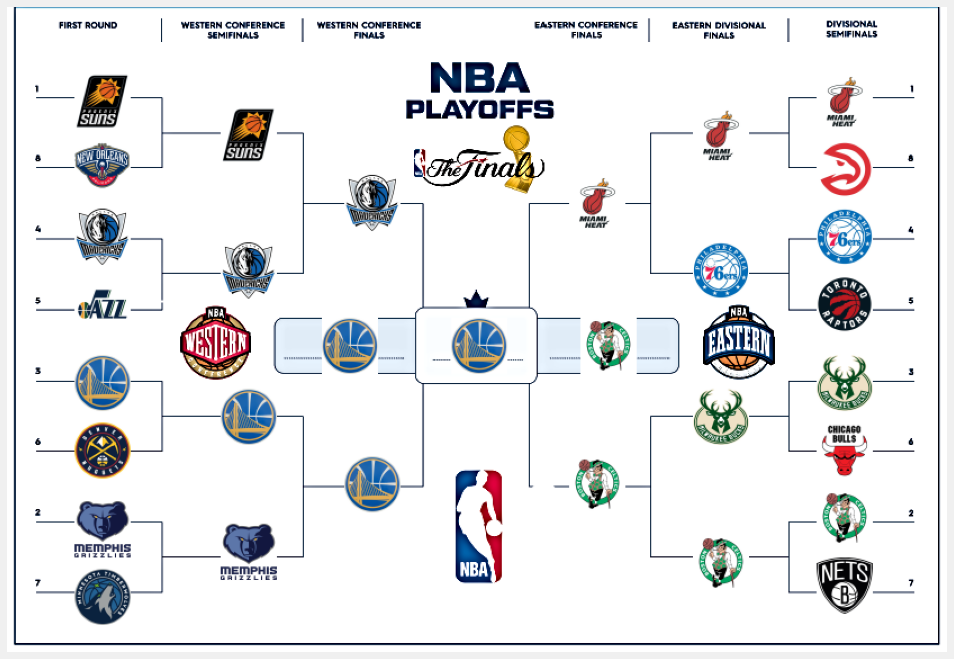

In [123]:
playoffs2021 = cv2.cvtColor(playoffs2021, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,14))
plt.axis('off')
plt.imshow(playoffs2021)
plt.show()

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 60%;"
    src="https://media.giphy.com/media/1URYTNvDM2LJoMIdxE/giphy.gif?cid=ecf05e473r7m0wek3aidqin5y29ugkxtku6fsz4qu8ubbtph&rid=giphy.gif&ct=g" >
</img>

## <p style="text-align: center;"> **Main Targets of the Project** 🔍
- <span style="color:lightgreen"> ***Most efficient Field Goal ✔***
- <span style="color:lightgreen"> ***Change in Three-Pointers Style of Game of Modern NBA ✔***
- <span style="color:lightgreen"> ***Change in Triple Double Style of Game of Modern NBA ✔***
- <span style="color:lightgreen"> ***Rookie of the Year Prediction ✔***
- <span style="color:lightgreen"> ***Game Simulation ✔***
- <span style="color:lightgreen"> ***Playoffs Simulation ✔***
- <span style="color:darkturquoise"> ***Players Clustering 〰***
- *Most Valuable Player Prediction*

---
**<p style="text-align: center;"> *Similar Players Clustering in Roles⛹🏻‍♂️***

---
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 50%;"
    src="https://wallpaperforu.com/wp-content/uploads/2020/07/basketball-wallpaper-20070814180818.jpg" >
</img>

### <p style="text-align: center;"> KMeans for Similar Players

Another topic that we found interesting was that of finding similar type of players

For doing this we applied Kmeans

In Basketball there are five positions so five clusters were used

In [186]:
players = leagueleaders.LeagueLeaders().get_data_frames()[0]
players = players[players['MIN'] >= 500] # Players with at least averaged six minutes per game
# ['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF', 'AST_TOV', 'STL_TOV']

var_excluded = {'PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'EFF', 'AST_TOV', 'STL_TOV'}
# Averaging each stats by the games played: from total stats to per game stats
players_avg = [[np.round(players.iloc[x, y] / players['GP'].values[x], 2) if players.columns[y] not in var_excluded else players.iloc[x, y] for y in range(len(players.columns))] for x in range(len(players.values))]
players_avg_df = pd.DataFrame(players_avg, columns=players.columns)

# vars = ['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB','DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
vars = ['PTS', 'AST', 'REB', 'BLK', 'STL', 'FG3_PCT']

X = players_avg_df[vars]

### <p style="text-align: center;"> Data Cleaning

In [125]:
                                            # Illustrative Code
    
players = leagueleaders.LeagueLeaders().get_data_frames()[0]

# Only players that at least averaged six minutes per game are kept
players = players[players['MIN'] >= 500] 

Then every stat of a player is **averaged** by the number of matches that player played

In [126]:
                                # Illustrative Code

players_avg_df.head()

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1629027,1,Trae Young,ATL,76,34.89,9.36,20.32,0.460,3.07,...,3.74,9.70,0.95,0.09,3.99,1.68,28.36,2066,2.43,0.24
1,201942,2,DeMar DeRozan,CHI,76,36.09,10.18,20.20,0.504,0.66,...,5.16,4.92,0.89,0.32,2.38,2.34,27.87,1961,2.07,0.38
2,203954,3,Joel Embiid,PHI,68,33.76,9.79,19.62,0.499,1.37,...,11.71,4.18,1.13,1.46,3.15,2.66,30.57,2304,1.33,0.36
3,1628369,4,Jayson Tatum,BOS,76,35.93,9.32,20.58,0.453,3.03,...,8.01,4.39,0.99,0.64,2.86,2.29,26.92,1971,1.54,0.35
4,203999,5,Nikola Jokic,DEN,74,33.46,10.32,17.72,0.583,1.31,...,13.77,7.89,1.47,0.85,3.80,2.58,27.08,2862,2.08,0.39


### <p style="text-align: center;"> Data Cleaning

Only the stats of interest are kept

In [127]:
                                # Illustrative Code
    
vars = ['PTS', 'AST', 'REB', 'BLK', 'STL', 'FG3_PCT']
X = players_avg_df[vars]
X.head(10)

,PTS,AST,REB,BLK,STL,FG3_PCT
0,28.36,9.70,3.74,0.09,0.95,0.382
1,27.87,4.92,5.16,0.32,0.89,0.352
2,30.57,4.18,11.71,1.46,1.13,0.371
3,26.92,4.39,8.01,0.64,0.99,0.353
4,27.08,7.89,13.77,0.85,1.47,0.337
5,29.88,5.79,11.61,1.36,1.07,0.293
6,28.42,8.74,9.12,0.55,1.15,0.353
7,26.79,4.84,5.03,0.38,1.13,0.383
8,24.57,3.64,9.82,1.12,0.97,0.410
9,25.87,5.34,4.21,0.18,1.48,0.355


Then the data is scaled

In [187]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### <p style="text-align: center;"> Clusters

In [188]:
clusters = pd.DataFrame(KMeans(n_clusters=5, random_state=0).fit_predict(X_scaled), columns=['CLUSTER'])

players_roles = pd.concat([players_avg_df, clusters], axis=1)
players_roles[['PLAYER', 'CLUSTER'] + vars].head()

,PLAYER,CLUSTER,PTS,AST,REB,BLK,STL,FG3_PCT
0,Trae Young,4,28.36,9.70,3.74,0.09,0.95,0.382
1,DeMar DeRozan,4,27.87,4.92,5.16,0.32,0.89,0.352
2,Joel Embiid,3,30.57,4.18,11.71,1.46,1.13,0.371
3,Jayson Tatum,4,26.92,4.39,8.01,0.64,0.99,0.353
4,Nikola Jokic,4,27.08,7.89,13.77,0.85,1.47,0.337


In [189]:
cluster0 = players_roles[players_roles['CLUSTER'] == 0]
c0 = cluster0.drop(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'EFF', 'AST_TOV', 'STL_TOV'], axis=1)
c0_avg = pd.DataFrame([round(c0.mean(), 2)], columns=vars)
# c0_avg

In [190]:
cluster1 = players_roles[players_roles['CLUSTER'] == 1]
c1 = cluster1.drop(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'EFF', 'AST_TOV', 'STL_TOV'], axis=1)
c1_avg = pd.DataFrame([round(c1.mean(), 2)], columns=vars)
# c1_avg

In [191]:
cluster2 = players_roles[players_roles['CLUSTER'] == 2]
c2 = cluster2.drop(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'EFF', 'AST_TOV', 'STL_TOV'], axis=1)
c2_avg = pd.DataFrame([round(c2.mean(), 2)], columns=vars)
# c2_avg

In [192]:
cluster3 = players_roles[players_roles['CLUSTER'] == 3]
c3 = cluster3.drop(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'EFF', 'AST_TOV', 'STL_TOV'], axis=1)
c3_avg = pd.DataFrame([round(c3.mean(), 2)], columns=vars)
# c3_avg

In [193]:
cluster4 = players_roles[players_roles['CLUSTER'] == 4]
c4 = cluster4.drop(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'EFF', 'AST_TOV', 'STL_TOV'], axis=1)
c4_avg = pd.DataFrame([round(c4.mean(), 2)], columns=vars)
# c4_avg

In [194]:
clusters_plot = pd.DataFrame([['0'] + c0_avg.values[0].tolist(), ['1'] + c1_avg.values[0].tolist(), ['2'] + c2_avg.values[0].tolist(), ['3'] + c3_avg.values[0].tolist(), ['4'] + c4_avg.values[0].tolist()], 
                    columns = ['CLUSTER'] + vars)
# clusters_plot

In [195]:
stats_plot = pd.DataFrame([[x] + clusters_plot[x].values.tolist() for x in clusters_plot.columns.tolist()[1:]],
                          columns=["STAT", "0", "1", "2", "3", "4"])
# stats_plot 

Then take the centroids of each cluster

In [196]:
clusters_plot

,CLUSTER,PTS,AST,REB,BLK,STL,FG3_PCT
0,0,11.68,2.71,3.76,0.37,0.94,0.36
1,1,7.07,1.37,3.10,0.30,0.50,0.33
2,2,8.17,1.36,7.58,1.05,0.68,0.01
3,3,14.34,2.10,7.65,1.17,0.75,0.35
4,4,21.25,6.32,6.05,0.48,1.23,0.35


In [197]:
stats_plot

,STAT,0,1,2,3,4
0,PTS,11.68,7.07,8.17,14.34,21.25
1,AST,2.71,1.37,1.36,2.10,6.32
2,REB,3.76,3.10,7.58,7.65,6.05
3,BLK,0.37,0.30,1.05,1.17,0.48
4,STL,0.94,0.50,0.68,0.75,1.23
5,FG3_PCT,0.36,0.33,0.01,0.35,0.35


### <p style="text-align: center;"> Box Score Statistic Barplot

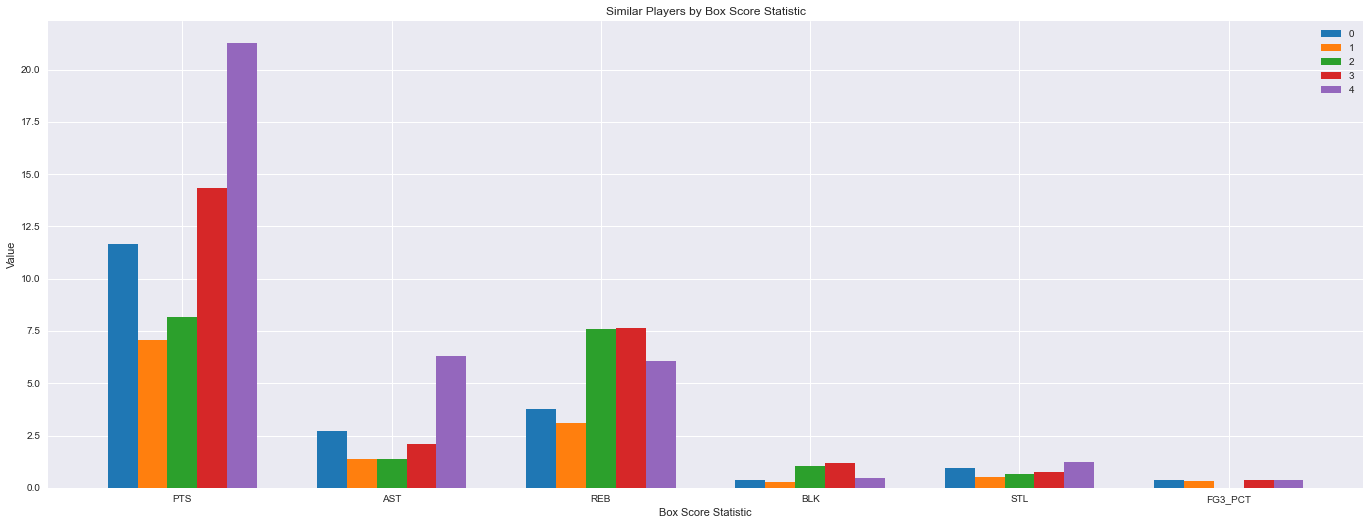

In [139]:
plt.style.use('seaborn') # seaborn / fivethirtyeight
plt.figure(figsize=(21,8))

x = np.arange(0, len(vars)*7, 7)
w = 1

plt.bar(x-2, stats_plot['0'].tolist(), width=w, color='tab:blue')
plt.bar(x-1, stats_plot['1'].tolist(), width=w, color='tab:orange')
plt.bar(x, stats_plot['2'].tolist(), width=w, color='tab:green')
plt.bar(x+1, stats_plot['3'].tolist(), width=w, color='tab:red')
plt.bar(x+2, stats_plot['4'].tolist(), width=w, color='tab:purple')


plt.xticks(x, vars)
plt.xlabel("Box Score Statistic")
plt.ylabel("Value")
plt.legend(["0", "1", "2", "3", "4"])
plt.title("Similar Players by Box Score Statistic")

plt.show()

### <p style="text-align: center;"> Clusters Barplot

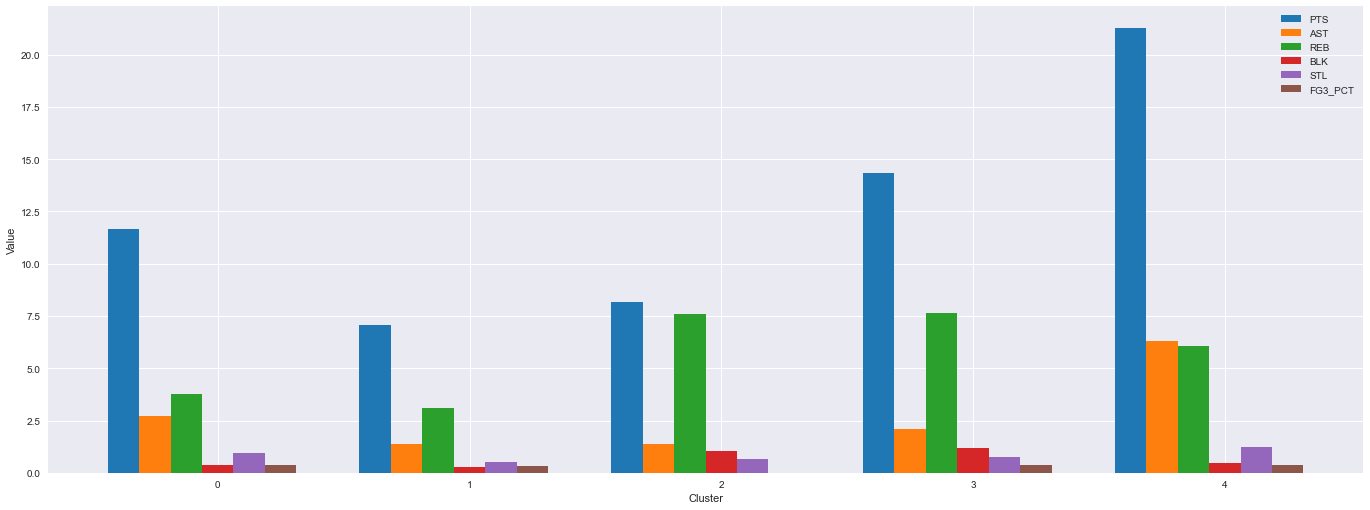

In [140]:
plt.style.use('seaborn') # seaborn / fivethirtyeight
plt.figure(figsize=(21,8))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 
          'tab:gray', 'tab:olive', 'tab:cyan', 'b', 'g', 'r', 'c', 'm', 'k', 'w', 'gold']
x = np.arange(0, (len(vars)+2)*5, len(vars)+2)
w = 1
l = np.arange(-len(vars)/2, len(vars)/2)

for i,var in enumerate(vars):
    plt.bar(x+l[i], clusters_plot[var].tolist(), width=w, color=colors[i])

plt.xticks(x, ["0", "1", "2", "3", "4"])
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.legend(vars)

plt.show()

### <p style="text-align: center;"> Clusters Dimensions & Info

In [141]:
print(f"Members of Cluster 0 :", len(c0))
print(f"Members of Cluster 1 :", len(c1))
print(f"Members of Cluster 2 :", len(c2))
print(f"Members of Cluster 3 :", len(c3))
print(f"Members of Cluster 4 :", len(c4))

Members of Cluster 0 : 117
Members of Cluster 1 : 148
Members of Cluster 2 : 23
Members of Cluster 3 : 37
Members of Cluster 4 : 50


In [142]:
print("       Player       |       Clusters       ")
print("Stephen Curry       |        ", players_roles[players_roles['PLAYER'] == 'Stephen Curry']['CLUSTER'].values[0])
print("LeBron James        |        ", players_roles[players_roles['PLAYER'] == 'LeBron James']['CLUSTER'].values[0])
print("Kevin Durant        |        ", players_roles[players_roles['PLAYER'] == 'Kevin Durant']['CLUSTER'].values[0])
print("Nikola Jokic        |        ", players_roles[players_roles['PLAYER'] == 'Nikola Jokic']['CLUSTER'].values[0])
print("Klay Thompson       |        ", players_roles[players_roles['PLAYER'] == 'Klay Thompson']['CLUSTER'].values[0])
print("Steven Adams        |        ", players_roles[players_roles['PLAYER'] == 'Steven Adams']['CLUSTER'].values[0])
print("Russell Westbrook   |        ", players_roles[players_roles['PLAYER'] == 'Russell Westbrook']['CLUSTER'].values[0])
print("Rudy Gobert         |        ", players_roles[players_roles['PLAYER'] == 'Rudy Gobert']['CLUSTER'].values[0])

       Player       |       Clusters       
Stephen Curry       |         4
LeBron James        |         4
Kevin Durant        |         4
Nikola Jokic        |         4
Klay Thompson       |         0
Steven Adams        |         2
Russell Westbrook   |         4
Rudy Gobert         |         2


In [ ]:
cleaned_players = players_roles[vars + ['CLUSTER']]
# cleaned_players

<IPython.core.display.Javascript object>


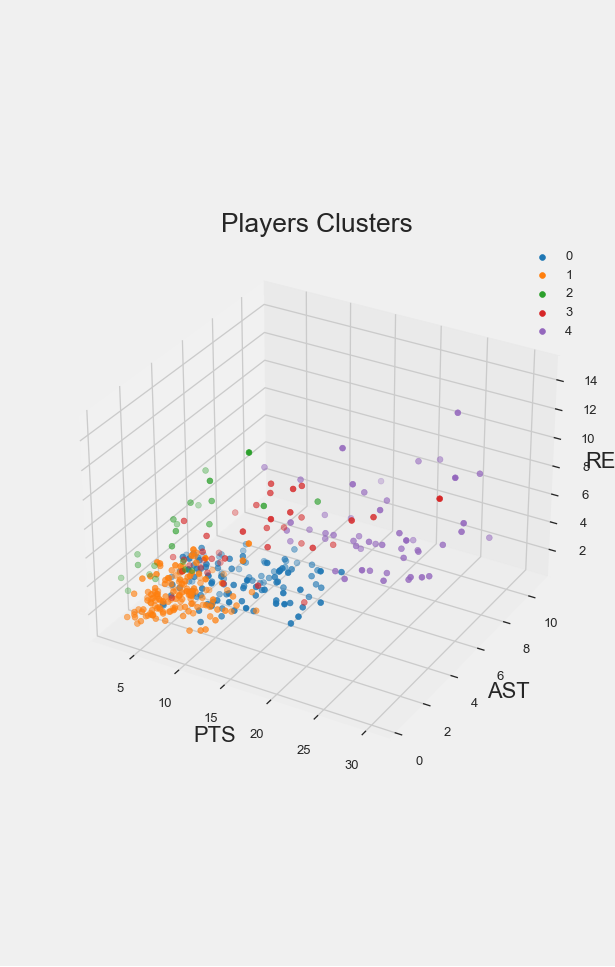

In [199]:
plt.style.use('fivethirtyeight') # seaborn / fivethirtyeight

ax = plt.figure(figsize=(7,11)).add_subplot(111, projection='3d')
# ax.grid(False)
map = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
i = 0
cleaned_players = players_roles[vars + ['CLUSTER']]

for grp_name, grp_idx in cleaned_players.groupby('CLUSTER').groups.items():
    x = cleaned_players.iloc[grp_idx, 0] # PTS
    x_mean = cleaned_players.iloc[grp_idx, 0].mean() # PTS mean
    y = cleaned_players.iloc[grp_idx, 1] # AST
    y_mean = cleaned_players.iloc[grp_idx, 1].mean() # AST mean
    z = cleaned_players.iloc[grp_idx, 2] # REB
    z_mean = cleaned_players.iloc[grp_idx, 2].mean() # REB
    ax.scatter(x, y, z, c=map[i], label=grp_name)
    # ax.scatter(x_mean, y_mean, z_mean, c="k", marker="X") # Centroids
    i += 1

ax.set_xlabel("PTS")
ax.set_ylabel("AST")
ax.set_zlabel("REB")
ax.set_title("Players Clusters")
ax.legend()
plt.show()

In [221]:
%matplotlib notebook

<IPython.core.display.Javascript object>


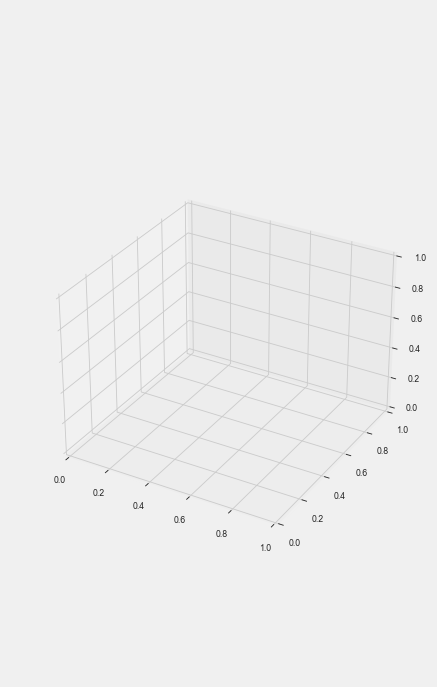

KeyError: "['SEASON', 'MVP'] not in index"

In [222]:
plt.style.use('fivethirtyeight') # seaborn / fivethirtyeight

ax = plt.figure(figsize=(7,11)).add_subplot(111, projection='3d')
# ax.grid(False)
map = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
i = 0
cleaned_players = players_roles[vars + ['CLUSTER']]

for grp_name, grp_idx in cleaned_players.groupby('CLUSTER').groups.items():
    x = cleaned_players.iloc[grp_idx, 0] # PTS
    x_mean = cleaned_players.iloc[grp_idx, 0].mean() # PTS mean
    y = cleaned_players.iloc[grp_idx, 1] # AST
    y_mean = cleaned_players.iloc[grp_idx, 1].mean() # AST mean
    z = cleaned_players.iloc[grp_idx, 2] # REB
    z_mean = cleaned_players.iloc[grp_idx, 2].mean() # REB
    ax.scatter(x, y, z, c=map[i], label=grp_name)
    # ax.scatter(x_mean, y_mean, z_mean, c="k", marker="X") # Centroids
    i += 1

ax.set_xlabel("PTS")
ax.set_ylabel("AST")
ax.set_zlabel("REB")
ax.set_title("Players Clusters")
ax.legend()
plt.show()

In [224]:
%matplotlib inline

## <p style="text-align: center;"> **Main Targets of the Project** 🔍
- <span style="color:lightgreen"> ***Most efficient Field Goal ✔***
- <span style="color:lightgreen"> ***Change in Three-Pointers Style of Game of Modern NBA ✔***
- <span style="color:lightgreen"> ***Change in Triple Double Style of Game of Modern NBA ✔***
- <span style="color:lightgreen"> ***Rookie of the Year Prediction ✔***
- <span style="color:lightgreen"> ***Game Simulation ✔***
- <span style="color:lightgreen"> ***Playoffs Simulation ✔***
- <span style="color:lightgreen"> ***Players Clustering ✔***
- <span style="color:darkturquoise"> ***Most Valuable Player Prediction 〰***

---
**<p style="text-align: center;"> *Most Valuable Player Prediction 🏆***

---
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 50%;"
    src="https://sportsierra.com/wp-content/uploads/2018/09/nba-basketball-hoop-height.jpg" >
</img>

### *. . . What is the Most Valuable Player award?* 💭

Similar to the *Rookie of the Year award*, this award is given to the **best player** of the **regular season**

The best player is **voted** simarly as the *ROTY award*

The player with the **highest point** total wins the award

Also in this occasion we were interested in seeing how many times the actual best player of the season won the award

The **Logistic Regression** was once more the *'tool'* used

In [205]:
tot_vars = ['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF', 'AST_TOV', 'STL_TOV']
var_excluded = ['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'EFF', 'AST_TOV', 'STL_TOV']

vars = ['SEASON', 'MVP', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB','DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
#vars = ['PTS', 'AST', 'REB', 'BLK', 'STL', 'FG3_PCT']

In [208]:
if not skip:
    #awards = playerawards.PlayerAwards(id).get_data_frames()[0] # NBA Most Valuable Player
    year = 1979 # First year without any null stat
    alltime_players = pd.DataFrame([], columns=tot_vars + ['MVP'])

    while year != 2022:
        players = leagueleaders.LeagueLeaders(season=str(year)+'-'+str(year+1)[2:]).get_data_frames()[0]
        time.sleep(.25)
        
        mvp_zeroes = pd.DataFrame([0]*len(players), columns=['MVP'])
        season = pd.DataFrame([year]*len(players), columns=['SEASON'])
        players = pd.concat([players, mvp_zeroes], axis=1)
        players = pd.concat([players, season], axis=1)
        
        for id in players['PLAYER_ID'].values:
            awards = playerawards.PlayerAwards(id).get_data_frames()[0]
            time.sleep(.25)
            
            mvps = awards[awards['DESCRIPTION'] == 'NBA Most Valuable Player']
            if not mvps.empty:
                if str(year)+'-'+str(year+1)[2:] in mvps['SEASON'].values:
                    players.at[players.index[players['PLAYER_ID'] == id][0], 'MVP'] = 1
                    break

        alltime_players = pd.concat([alltime_players, players])
        year += 1
        
    alltime_players

In [209]:
if not skip:
    alltime_players.to_csv("df/AllTimePlayersMVP", index=False)

In [210]:
alltime_players = pd.read_csv("df/AllTimePlayersMVP")

In [152]:
alltime_players['MVP'].sum()

43

In [153]:
X = alltime_players[vars]
y = alltime_players[['SEASON', 'MVP']]

season = 2021
X_train = X[X['SEASON'] != season].drop(['MVP'], axis=1)
X_test = X[X['SEASON'] == season].drop(['MVP'], axis=1)
y_train = y[y['SEASON'] != season].drop(['SEASON'], axis=1).astype('int').to_numpy()[:,0]
y_test = y[y['SEASON'] == season].drop(['SEASON'], axis=1).astype('int').to_numpy()[:,0]

In [154]:
scaler = StandardScaler()
scaler.fit_transform(X_train);

In [155]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [156]:
# Instantiating the model
log_regression = LogisticRegression()

# Fitting the model using the training data
log_regression.fit(X_train_norm,y_train)

# Using the model to make predictions on test data
y_pred = log_regression.predict(X_test_norm)
y_prob = log_regression.predict_proba(X_test_norm)

In [157]:
# y_pred

In [158]:
prob = y_prob[:, 1].round(3)
# prob

In [159]:
i = y_pred.argmax()
players = leagueleaders.LeagueLeaders(season='2021-22').get_data_frames()[0]
print("Predicted Winner:", players.iloc[i]['PLAYER'])
print("Real Winner:     ", alltime_players.loc[(alltime_players['SEASON'] == 2021) & (alltime_players['MVP'] == 1)]['PLAYER'].values[0])

Predicted Winner: Nikola Jokic
Real Winner:      Nikola Jokic


In [160]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy: 100.0 %


### <p style="text-align: center;"> MVP Prediction

In [161]:
                                                # Illustrative Code    
vars = ['SEASON', 'MVP', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', \
        'FT_PCT', 'OREB','DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS  

In [162]:
                                                # Illustrative Code    
X = alltime_players[vars]
y = alltime_players[['SEASON', 'MVP']]

In [163]:
                                                # Illustrative Code    
X_train = X[X['SEASON'] != season]#.drop(['MVP'])
X_test = X[X['SEASON'] == season]#.drop(['MVP'])
y_train = y[y['SEASON'] != season]#.drop(['SEASON'])
y_test = y[y['SEASON'] == season]#.drop(['SEASON'])

In [164]:
                                                # Illustrative Code    
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
                                                # Illustrative Code    
log_regression = LogisticRegression(max_iter=10000)
log_regression.fit(X_train_norm,y_train)

### <p style="text-align: center;"> MVP Prediction

We used this model to **predict MVPs** from **1980** to **2021**

In [212]:
X = alltime_players[vars]
y = alltime_players[['SEASON', 'MVP']]
correct_pred,tot_pred = 0,0

season = 1980
while season != 2022:
    X_train = X[X['SEASON'] != season].drop(['MVP'], axis=1)
    X_test = X[X['SEASON'] == season].drop(['MVP'], axis=1)
    y_train = y[y['SEASON'] != season].drop(['SEASON'], axis=1).astype('int').to_numpy()[:,0]
    y_test = y[y['SEASON'] == season].drop(['SEASON'], axis=1).astype('int').to_numpy()[:,0]

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)

    log_regression = LogisticRegression(max_iter=10000)
    log_regression.fit(X_train_norm,y_train)

    y_prob = log_regression.predict_proba(X_test_norm)
    prob = y_prob[:, 1].round(3)
    prob_max = [1 if x == prob.max() else 0 for x in prob]

    cnf_matrix = metrics.confusion_matrix(y_test, prob_max)
    correct_pred += cnf_matrix[1][1]
    tot_pred += 1

    season += 1
print("Accuracy:", round(correct_pred / tot_pred * 100, 2), "%")

Accuracy: 45.24 %


More in detail from **2010** to **2021**

In [211]:
X = alltime_players[vars]
y = alltime_players[['SEASON', 'MVP']]
correct_pred,tot_pred = 0,0

season = 2010
while season != 2022:
    X_train = X[X['SEASON'] != season].drop(['MVP'], axis=1)
    X_test = X[X['SEASON'] == season].drop(['MVP'], axis=1)
    y_train = y[y['SEASON'] != season].drop(['SEASON'], axis=1).astype('int').to_numpy()[:,0]
    y_test = y[y['SEASON'] == season].drop(['SEASON'], axis=1).astype('int').to_numpy()[:,0]

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)

    log_regression = LogisticRegression(max_iter=10000)
    log_regression.fit(X_train_norm,y_train)

    y_prob = log_regression.predict_proba(X_test_norm)
    prob = y_prob[:, 1].round(3)
    prob_max = [1 if x == prob.max() else 0 for x in prob]

    cnf_matrix = metrics.confusion_matrix(y_test, prob_max)
    correct_pred += cnf_matrix[1][1]
    tot_pred += 1

    season += 1
print("Accuracy:", round(correct_pred / tot_pred * 100, 2), "%")

Accuracy: 58.33 %



## <p style="text-align: center;"> **Main Targets of the Project** 🔍
- <span style="color:lightgreen"> ***Most efficient Field Goal ✔***
- <span style="color:lightgreen"> ***Change in Three-Pointers Style of Game of Modern NBA ✔***
- <span style="color:lightgreen"> ***Change in Triple Double Style of Game of Modern NBA ✔***
- <span style="color:lightgreen"> ***Rookie of the Year Prediction ✔***
- <span style="color:lightgreen"> ***Game Simulation ✔***
- <span style="color:lightgreen"> ***Playoffs Simulation ✔***
- <span style="color:lightgreen"> ***Players Clustering ✔***
- <span style="color:lightgreen"> ***Most Valuable Player Prediction ✔***

# **The End**

***Thanks for your attention!*** 🏀


<center><img src="https://media.giphy.com/media/uqamsEc5cm3qU/giphy.gif?cid=ecf05e47ce9mzi10p03zipqbs0h5ihroojbx9ng8sl2jwc25&rid=giphy.gif&ct=g"/></center>